<a href="https://colab.research.google.com/github/rohitfattepur/Tensorflow/blob/master/SO_Home.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Callbacks in model.fit
https://stackoverflow.com/questions/60808723/how-to-call-a-method-as-a-custom-callback-in-keras/60815917#60815917

In [0]:
# (1) Importing dependency
%tensorflow_version 1.x
import tensorflow as tf
import keras
from keras import backend as K
 from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np

np.random.seed(1000)
    
# (2) Get Data
import tflearn.datasets.oxflower17 as oxflower17
x, y = oxflower17.load_data(one_hot=True)
    
# (3) Create a sequential model
model = Sequential()
    
# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())
    
# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())
    
# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())
    
# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())
    
# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())
    
# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(17))
model.add(Activation('softmax'))

model.summary()

# (4) Compile 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epoch_gradient = []

def get_gradient_func(model):
    grads = K.gradients(model.total_loss, model.trainable_weights)
    inputs = model.model._feed_inputs + model.model._feed_targets + model.model._feed_sample_weights
    func = K.function(inputs, grads)
    return func

# Define the Required Callback Function
class GradientCalcCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
      get_gradient = get_gradient_func(model)
      grads = get_gradient([x, y, np.ones(len(y))])
      epoch_gradient.append(grads)
    
epoch = 4

model.fit(x, y, batch_size=64, epochs= epoch, verbose=1, validation_split=0.2, shuffle=True, callbacks=[GradientCalcCallback()])
    
# (7) Convert to a 2 dimensiaonal array of (epoch, gradients) type
gradient = np.asarray(epoch_gradient)
print("Total number of epochs run:", epoch)
print("Gradient Array has the shape:",gradient.shape)

Using TensorFlow backend.


ModuleNotFoundError: ignored

In [0]:
# summarize filter shapes
for layer in model.layers:
	# check for convolutional layer
	if 'conv' in layer.name:
	  # get filter weights
	  filters, biases = layer.get_weights()
	  print(layer.name, filters.shape)

ERROR! Session/line number was not unique in database. History logging moved to new session 62
conv2d_21 (11, 11, 3, 96)
conv2d_22 (11, 11, 96, 256)
conv2d_23 (3, 3, 256, 384)
conv2d_24 (3, 3, 384, 384)
conv2d_25 (3, 3, 384, 256)


In [0]:
# summarize filter shapes
for layer in model.layers:
	# check for convolutional layer
	if 'conv' in layer.name:
	  # get filter weights
	  filters, biases = layer.get_weights()

print(filters.shape)
print(filters)

# Tensor to Array(ndarray) 
https://stackoverflow.com/questions/60824788/how-to-convert-tensor-to-ndarray

In [0]:
#!pip install tensorflow==2.1

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
#import time

print("tensorflow version:",tf.__version__)

def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(7,(3,3) , padding = "same" , input_shape = (28,28,1)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Dense(50,activation = 'relu'))
    model.add(tf.keras.layers.Dense(1))
    return model 

model_discriminator = make_discriminator_model()
output = model_discriminator(np.random.rand(1,28,28,1).astype("float32"))
print("Output as a Tensor:",output)

out = np.array(output)
print("Output as an Array:",out)
print("Type of the Array:",type(out))

tensorflow version: 2.1.0
Output as a Tensor: tf.Tensor([[-0.40550372]], shape=(1, 1), dtype=float32)
Output as an Array: [[-0.40550372]]
Type of the Array: <class 'numpy.ndarray'>


In [0]:
#!pip install tensorflow==1.14

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import time

print("tensorflow version:",tf.__version__)

def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(7,(3,3) , padding = "same" , input_shape = (28,28,1)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.LeakyReLU())
    model.add(tf.keras.layers.Dense(50,activation = 'relu'))
    model.add(tf.keras.layers.Dense(1))
    return model 

model_discriminator = make_discriminator_model()
output = model_discriminator(np.random.rand(1,28,28,1).astype("float32"))

#initialize the variable
init_op = tf.initialize_all_variables()

#run the graph
with tf.Session() as sess:
    sess.run(init_op) #execute init_op
    print("Output as a Tensor:",output)
    out = np.array(sess.run(output))
    print("Output as an Array:",out)
    print("Type of the Array:",type(out)

tensorflow version: 1.14.0
Output as a Tensor: Tensor("sequential_7/dense_15/BiasAdd:0", shape=(1, 1), dtype=float32)
Output as an Array: [[-0.29746282]]
Type of the Array: <class 'numpy.ndarray'>


# Switching between Tensorflow Versions without installing everytime
https://stackoverflow.com/questions/60810400/how-to-upgrade-tensorflow-to-2-0-in-google-colab-permanently/60810715#60810715

In [0]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

1.15.0


In [0]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 2.x selected.
2.1.0


# One Hot Encoding Using LabelBinarizer
https://stackoverflow.com/questions/60868391/how-to-view-class-labels-after-one-hot-encoding-during-training-testing-and-afte/60871869#60871869

In [0]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical

# define example
data = ['dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat', 'dog', 'dog']

values = np.array(data)

#Binary encode
lb = LabelBinarizer()

labels = lb.fit_transform(values)
labels = to_categorical(labels)
print("which position represents for cat and dog?:")
print("Data is:",data)
print(labels)

which position represents for cat and dog?:
Data is: ['dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat', 'dog', 'dog']
[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [0]:
import numpy as np
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical

# define example
data1 = ['cat', 'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'dog', 'cat', 'cat']
data2 = ['dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat', 'dog', 'dog']

values1 = np.array(data1)
values2 = np.array(data2)

#Binary encode
lb = LabelBinarizer()

labels1 = lb.fit_transform(values1)
labels1 = to_categorical(labels1)
print("what is value for cat and dog?:")
print("Data is:",data1)
print(labels1)
print("\n")

labels2 = lb.fit_transform(values2)
labels2 = to_categorical(labels2)
print("what is value for cat and dog?:")
print("Data is:",data2)
print(labels2)

what is value for cat and dog?:
Data is: ['cat', 'cat', 'dog', 'cat', 'dog', 'dog', 'cat', 'dog', 'cat', 'cat']
[[1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


what is value for cat and dog?:
Data is: ['dog', 'dog', 'cat', 'dog', 'cat', 'cat', 'dog', 'cat', 'dog', 'dog']
[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [0]:
import numpy as np
rslt = np.array([[0.9550967,0.04490325]])
rslt = np.argmax(rslt)
print(rslt)

0


In [0]:
import numpy as np
rslt = np.array([[0.04490325,0.9550967, 1]])
rslt = np.argmax(rslt)
print(rslt)

2


# Ragged Tensor
https://stackoverflow.com/questions/60924624/is-there-a-way-to-normalize-a-ragged-tensor

## Using math.l2_normalize

In [0]:
import tensorflow as tf
import keras
import numpy as np

# Create a Ragged Tensor
rt = tf.ragged.constant([[9.0, 8.0, 7.0], [], [6.0, 5.0], [4.0]])
print("Ragged Tensor:","\n",rt,"\n")

# Convert to Tensor to have same length
rt = rt.to_tensor()
print("Tensor of same length:","\n",rt,"\n")

# Normalize
rt = tf.math.l2_normalize(rt, axis = None)
print("Normalized Tensor:","\n",rt,"\n")

# Convert to Ragged Tensor
rt = tf.RaggedTensor.from_tensor(rt, padding=0.0)
print("Normalized Ragged Tensor:","\n",rt)

Ragged Tensor: 
 <tf.RaggedTensor [[9.0, 8.0, 7.0], [], [6.0, 5.0], [4.0]]> 

Tensor of same length: 
 tf.Tensor(
[[9. 8. 7.]
 [0. 0. 0.]
 [6. 5. 0.]
 [4. 0. 0.]], shape=(4, 3), dtype=float32) 

Normalized Tensor: 
 tf.Tensor(
[[0.546711   0.48596537 0.4252197 ]
 [0.         0.         0.        ]
 [0.36447403 0.30372834 0.        ]
 [0.24298269 0.         0.        ]], shape=(4, 3), dtype=float32) 

Normalized Ragged Tensor: 
 <tf.RaggedTensor [[0.5467110276222229, 0.485965371131897, 0.42521971464157104], [], [0.36447402834892273, 0.3037283420562744], [0.2429826855659485]]>


## Using tf.linalg.normalize

In [0]:
import tensorflow as tf
import keras
import numpy as np

# Create a Ragged Tensor
rt = tf.ragged.constant([[9.0, 8.0, 7.0], [], [6.0, 5.0], [4.0]])
print("Ragged Tensor:","\n",rt,"\n")

# Convert to Tensor to have same length
rt = rt.to_tensor()
print("Tensor of same length:","\n",rt,"\n")

# Normalize
rt = tf.linalg.normalize(rt, axis = None)
print("Normalized and Norm Tensor:","\n",rt,"\n")
# Get the normalized part
rt = tf.convert_to_tensor(rt[0])
print("Normalized Tensor:","\n",rt,"\n")

# Convert to Ragged Tensor
rt = tf.RaggedTensor.from_tensor(rt, padding=0.0)
print("Normalized Ragged Tensor:","\n",rt)

Ragged Tensor: 
 tf.RaggedTensor(values=Tensor("RaggedConstant/values:0", shape=(6,), dtype=float32), row_splits=Tensor("RaggedConstant/Const:0", shape=(5,), dtype=int64)) 

Tensor of same length: 
 Tensor("RaggedToTensor/GatherV2:0", shape=(4, 3), dtype=float32) 

Normalized and Norm Tensor: 
 (<tf.Tensor 'normalize/truediv:0' shape=(4, 3) dtype=float32>, <tf.Tensor 'normalize/norm/Sqrt:0' shape=(1, 1) dtype=float32>) 

Normalized Tensor: 
 Tensor("normalize/truediv:0", shape=(4, 3), dtype=float32) 

Normalized Ragged Tensor: 
 tf.RaggedTensor(values=Tensor("RaggedFromTensor/boolean_mask/GatherV2:0", shape=(?,), dtype=float32), row_splits=Tensor("RaggedFromTensor/concat:0", shape=(5,), dtype=int64))


# Deleting Layer using Keras Surgeon OR pop
https://stackoverflow.com/questions/60637199/error-in-removing-the-first-layer-of-keras-model

## Deleting the first or middle layer

In [0]:
!pip install kerassurgeon

In [0]:
# (1) Importing dependency
%tensorflow_version 1.x
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, Input

import kerassurgeon
from kerassurgeon.operations import delete_layer, insert_layer, delete_channels
    
# (3) Create a sequential model
model = Sequential()
    
# 1st Convolutional Layer
model.add(Conv2D(filters=12, input_shape=(24,24,1), kernel_size=(3,3), activation='relu'))
 
# 2nd Convolutional Layer
model.add(Conv2D(filters=24, kernel_size=(3,3), activation='relu'))

# 3rd Convolutional Layer
model.add(Conv2D(filters=24, kernel_size=(3,3), padding='same', activation='relu'))

# Passing it to a dense layer
model.add(Flatten())

# Dense Layer
model.add(Dense(5,activation='relu'))

# Dense Layer
model.add(Dense(100,activation='relu'))

# Dense Layer
model.add(Dense(100,activation='relu'))

# Output Layer
model.add(Dense(3,activation='softmax'))

model.summary()

# delete 3rd layer .i.e. Conv2D Layer from the model
layer_3 = model.layers[2]
model = delete_layer(model, layer_3)

model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 22, 22, 12)        120       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 20, 20, 24)        2616      
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 20, 20, 24)        5208      
_________________________________________________________________
flatten_7 (Flatten)          (None, 9600)              0         
_________________________________________________________________
dense_25 (Dense)             (None, 5)                 48005     
_________________________________________________________________
dense_26 (Dense)             (None, 100)               600       
_________________________________________________________________
dense_27 (Dense)             (None, 100)              

In [0]:
# (1) Importing dependency
%tensorflow_version 1.x
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, Input

import kerassurgeon
from kerassurgeon import Surgeon
    
# (3) Create a sequential model
model = Sequential()
    
# 1st Convolutional Layer
model.add(Conv2D(filters=12, input_shape=(24,24,1), kernel_size=(3,3), activation='relu'))
 
# 2nd Convolutional Layer
model.add(Conv2D(filters=24, kernel_size=(3,3), activation='relu'))

# 3rd Convolutional Layer
model.add(Conv2D(filters=24, kernel_size=(3,3), padding='same', activation='relu'))

# Passing it to a dense layer
model.add(Flatten())

# Dense Layer
model.add(Dense(5,activation='relu'))

# Dense Layer
model.add(Dense(100,activation='relu'))

# Dense Layer
model.add(Dense(100,activation='relu'))

# Output Layer
model.add(Dense(3,activation='softmax'))

model.summary()

# delete 3rd layer .i.e. Conv2D Layer from the model
layer_3 = model.layers[2]
surgeon = Surgeon(model)
surgeon.add_job('delete_layer', layer_3)
model = surgeon.operate()

model.summary()

TensorFlow is already loaded. Please restart the runtime to change versions.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 22, 22, 12)        120       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 24)        2616      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 24)        5208      
_________________________________________________________________
flatten_4 (Flatten)          (None, 9600)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 5)                 48005     
_________________________________________________________________
dense_14 (Dense)             (None, 100)               600       
___________________________________________

ValueError: ignored

In [0]:
# (1) Importing dependency
import tensorflow as tf
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np
    
# (3) Create a sequential model
model = Sequential()
    
# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())
    
# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())
    
# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())
    
# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())
    
# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())
    
# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(17))
model.add(Activation('softmax'))

model.summary()

model1 = model.layers.pop(0)

model1.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 54, 54, 96)        34944     
_________________________________________________________________
activation_55 (Activation)   (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_49 (Batc (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 17, 17, 256)       2973952   
_________________________________________________________________
activation_56 (Activation)   (None, 17, 17, 256)       0         
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 8, 8, 256)       

AttributeError: ignored

## To remove the last layer

In [0]:
# (1) Importing dependency
%tensorflow_version 1.x
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, Input

import kerassurgeon
from kerassurgeon import Surgeon
    
# (3) Create a sequential model
model = Sequential()
    
# 1st Convolutional Layer
model.add(Conv2D(filters=12, input_shape=(24,24,1), kernel_size=(3,3), activation='relu'))
 
# 2nd Convolutional Layer
model.add(Conv2D(filters=24, kernel_size=(3,3), activation='relu'))

# 3rd Convolutional Layer
model.add(Conv2D(filters=24, kernel_size=(3,3), padding='same', activation='relu'))

# Passing it to a dense layer
model.add(Flatten())

# Dense Layer
model.add(Dense(5,activation='relu'))

# Dense Layer
model.add(Dense(100,activation='relu'))

# Dense Layer
model.add(Dense(100,activation='relu'))

# Output Layer
model.add(Dense(3,activation='softmax'))

model.summary()

from keras.models import Model

model._layers.pop()

new_model = Model(model.input,model.layers[-1].output)

new_model.summary()

Model: "sequential_43"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_138 (Conv2D)          (None, 22, 22, 12)        120       
_________________________________________________________________
conv2d_139 (Conv2D)          (None, 20, 20, 24)        2616      
_________________________________________________________________
conv2d_140 (Conv2D)          (None, 20, 20, 24)        5208      
_________________________________________________________________
flatten_42 (Flatten)         (None, 9600)              0         
_________________________________________________________________
dense_165 (Dense)            (None, 5)                 48005     
_________________________________________________________________
dense_166 (Dense)            (None, 100)               600       
_________________________________________________________________
dense_167 (Dense)            (None, 100)             

# Multiple image input for keras application
https://stackoverflow.com/questions/60582442/multiple-image-input-for-keras-application/60968842#60968842

In [0]:
import tensorflow
from tensorflow.python.keras import layers, models, applications

# Multiple inputs
in1 = layers.Input(shape=(128,128,3))
in2 = layers.Input(shape=(128,128,3))
in3 = layers.Input(shape=(128,128,3))

# CNN output
cnn = applications.xception.Xception(include_top=False)
cnn.summary()

out1 = cnn(in1)
out2 = cnn(in2)
out3 = cnn(in3)

# Flattening the output for the dense layer
fout1 = layers.Flatten()(out1)
fout2 = layers.Flatten()(out2)
fout3 = layers.Flatten()(out3)

# Getting the dense output
dense = layers.Dense(100, activation='softmax')

dout1 = dense(fout1)
dout2 = dense(fout2)
dout3 = dense(fout3)

# Concatenating the final output
out = layers.Concatenate(axis=-1)([dout1, dout2, dout3])

# Creating the model
model = models.Model(inputs=[in1,in2,in3], outputs=out)
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_4[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
__________

In [0]:
%tensorflow_version 1.x
import tensorflow
import keras
from keras import Input, Model
from keras.applications.densenet import DenseNet121
from keras.layers import Dense
from keras.activations import relu

input_shape = (32,32,3)
#[(None, 32, 32, 3), (None, 32, 32, 3), (None, 32, 32, 3), (None, 32, 32, 3), (None, 32, 32, 3), (None, 32, 32, 3), (None, 32, 32, 3), (None, 32, 32, 3), (None, 32, 32, 3), (None, 32, 32, 3), (None, 32, 32, 3)]
#rt = tf.ragged.constant([[9.0, 8.0, 7.0], [], [6.0, 5.0], [4.0]])

in1 = Input(shape=(32,32,3))
in2 = Input(shape=(32,32,3))
in3 = Input(shape=(32,32,3))
in4 = Input(shape=(32,32,3))
in5 = Input(shape=(32,32,3))
in6 = Input(shape=(32,32,3))
in7 = Input(shape=(32,32,3))
in8 = Input(shape=(32,32,3))
in9 = Input(shape=(32,32,3))
in10 = Input(shape=(32,32,3))
in11 = Input(shape=(32,32,3))

inputs = [in1,in2,in3,in4,in5,in6,in7,in8,in9,in10,in11]
densenet_121_model = DenseNet121(include_top=False)(inputs)
output = Dense(units=11, activation='relu')(densenet_121_model)

model = Model(inputs=inputs, outputs=output)

ValueError: ignored

In [0]:
%tensorflow_version 1.x
import tensorflow
import keras
from keras import Input, Model
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, Flatten, Concatenate
from keras.activations import relu

# Multiple inputs
in1 = Input(shape=(128,128,3))
in2 = Input(shape=(128,128,3))
in3 = Input(shape=(128,128,3))

# CNN output
cnn = DenseNet121(include_top=False)
#cnn.summary()

out1 = cnn(in1)
out2 = cnn(in2)
out3 = cnn(in3)

# Flattening the output for the dense layer
fout1 = Flatten()(out1)
fout2 = Flatten()(out2)
fout3 = Flatten()(out3)

# Getting the dense output
dense = Dense(1, activation='softmax')

dout1 = dense(fout1)
dout2 = dense(fout2)
dout3 = dense(fout3)

# Concatenating the final output
out = Concatenate(axis=-1)([dout1, dout2, dout3])

# Creating the model
model = Model(inputs=[in1,in2,in3], outputs=out)
model.summary()

TensorFlow is already loaded. Please restart the runtime to change versions.
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_306 (InputLayer)          (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
input_307 (InputLayer)          (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
input_308 (InputLayer)          (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
densenet121 (Model)             multiple             7037504     input_306[0][0]                  
               

# Padding = Same and Padding = Valid 
https://stackoverflow.com/questions/60323897/tensorflow-keras-conv2d-layers-with-padding-same-behave-strangely

In [0]:
# (1) Importing dependency
%tensorflow_version 1.x
import tensorflow as tf
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D

# (3) Create a sequential model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=24, input_shape=(5,5,1), kernel_size=(2,2), strides =(2,2) ,padding='Same'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 3, 3, 24)          120       
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Importing dependency
%tensorflow_version 1.x
import keras
from keras.models import Sequential
from keras.layers import Conv2D

# Create a sequential model
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=24, input_shape=(5,5,1), kernel_size=(2,2), strides =(2,2) ,padding='Valid'))

# Model Summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 2, 2, 24)          120       
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Importing dependency
%tensorflow_version 1.x
import keras
from keras.models import Sequential
from keras.layers import Conv2D

# Create a sequential model
model = Sequential()

# Convolutional Layer
model.add(Conv2D(filters=24, input_shape=(6,6,1), kernel_size=(2,2), strides =(2,2) ,padding='Valid'))

# Model Summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 3, 3, 24)          120       
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


# model.fit_generator Plot
https://stackoverflow.com/questions/60306753/drawing-the-accuracy-of-multiple-validation-of-diffferent-cnn-classifiers

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

import os
import numpy as np
import matplotlib.pyplot as plt

_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

train_image_generator = ImageDataGenerator(rescale=1./255,brightness_range=[0.5,1.5]) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255,brightness_range=[0.5,1.5]) # Generator for our validation data

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

lr=0.01

for i in range(5):

    adam = Adam(lr)

    print("Model using learning rate of",lr)

    lr = lr + 0.01

    model.compile(optimizer=adam, 
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

    history = model.fit_generator(
              train_data_gen,
              steps_per_epoch=total_train // batch_size,
              epochs=epochs,
              validation_data=val_data_gen,
              validation_steps=total_val // batch_size)
    
    plt.plot(100 * history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['LR=0.01', 'LR=0.02', 'LR=0.03', 'LR=0.04', 'LR=0.05'], loc='upper left')
plt.show()

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

import os
import numpy as np
import matplotlib.pyplot as plt

_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

train_image_generator = ImageDataGenerator(rescale=1./255,brightness_range=[0.5,1.5]) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255,brightness_range=[0.5,1.5]) # Generator for our validation data

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']

for i in range(7):

    print("Model using",optimizer[i],"optimizer")

    model.compile(optimizer=optimizer[i], 
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

    history = model.fit_generator(
              train_data_gen,
              steps_per_epoch=total_train // batch_size,
              epochs=epochs,
              validation_data=val_data_gen,
              validation_steps=total_val // batch_size)
    
    plt.plot(history.history['val_accuracy'])

plt.title('Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam'], loc='upper left')
plt.show()

68608000/68606236 [==============================] - 1s 0us/step
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model using SGD optimizer
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/15
15/15 [==============================] - 55s 4s/step - loss: 0.6927 - acc: 0.5032 - val_loss: 0.6918 - val_acc: 0.5056
Epoch 2/15
15/15 [==============================] - 54s 4s/step - loss: 0.6911 - acc: 0.4995 - val_loss: 0.6911 - val_acc: 0.5056
Epoch 3/15
15/15 [==============================] - 54s 4s/step - loss: 0.6895 - acc: 0.4931 - val_loss: 0.6904 - val_acc: 0.5056
Epoch 4/15
15/15 [==============================] - 55s 4s/step - loss: 0.6896 - acc: 0.4911 - val_loss: 0.6903 - val_acc: 0.5056
Epoch 5/15
15/15 [==============================] - 53s 4s/step - loss: 0.6896 - acc: 0.5134 - val_loss: 0.6885 - val_acc: 0.5056


KeyError: ignored

# Visualizing the Conv3D and Conv2D Kernel and Visualizing the Filters
https://stackoverflow.com/questions/60456336/weight-visualization-of-3d-convolutional-kernel

Interesting Read that helps in visualizing the image after every layer - https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/

Params of a layer -
“(n* m * l+1)*k”
- The filter size is “n*m”.
- “l” feature maps as the input 
- “k” feature maps as output


## Conv3D Visualization

In [0]:
# (1) Importing dependency
%tensorflow_version 1.x
import tensorflow as tf
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, Conv3D
from keras.layers.normalization import BatchNormalization
import numpy as np

np.random.seed(1000)
    
# (2) Get Data
import tflearn.datasets.oxflower17 as oxflower17
x, y = oxflower17.load_data(one_hot=True)
x = np.expand_dims(x,-1)
    
# (3) Create a sequential model
model = Sequential()
    
# 1st Convolutional Layer
model.add(Conv3D(filters=2, input_shape=(224,224,3,1), kernel_size=(3,3,3), strides=(4,4,4), padding='Same'))
model.add(Activation('relu'))
    
# 2nd Convolutional Layer
model.add(Conv3D(filters=4, kernel_size=(4,4,4), strides=(1,1,1), padding='Same'))
model.add(Activation('relu'))
    
# 3rd Convolutional Layer
model.add(Conv3D(filters=2, kernel_size=(4,4,4), strides=(1,1,1), padding='Same'))
model.add(Activation('relu'))

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(100))
model.add(Activation('relu'))

# Output Layer
model.add(Dense(17))
model.add(Activation('softmax'))

model.summary()

# (4) Compile 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


model.fit(x, y, batch_size=64, epochs= 4, verbose=1, validation_split=0.2, shuffle=True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 56, 56, 1, 2)      56        
_________________________________________________________________
activation_33 (Activation)   (None, 56, 56, 1, 2)      0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 56, 56, 1, 4)      516       
_________________________________________________________________
activation_34 (Activation)   (None, 56, 56, 1, 4)      0         
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 56, 56, 1, 2)      514       
_________________________________________________________________
activation_35 (Activation)   (None, 56, 56, 1, 2)      0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)             

In [0]:
import numpy as np
x = model.layers[4].kernel

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(sess.run(x))

In [0]:
# summarize filter shapes
for layer in model.layers:
	# check for convolutional layer
	if 'conv' in layer.name:
	  # get filter weights
	  filters, biases = layer.get_weights()
	  print(layer.name, filters.shape)
	 
#print(biases)

conv3d_1 (3, 3, 3, 1, 2)
conv3d_2 (4, 4, 4, 2, 4)
conv3d_3 (4, 4, 4, 4, 2)


### To print Color Image

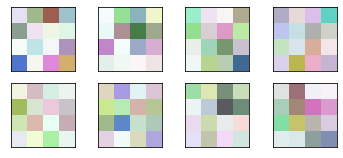

In [0]:
from matplotlib import pyplot

# # summarize filter shapes
# for layer in model.layers:
# 	# check for convolutional layer
# 	if 'conv' in layer.name:
# 	  # get filter weights
# 	  filters, biases = layer.get_weights()
   
# retrieve weights from the second hidden layer
filters, biases = model.layers[4].get_weights()

# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
# n_filters = outgoing channels
outgoing_channels = 2
n_filters, ix = outgoing_channels, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, :, i]
	# plot each channel separately
	# Range of incoming channels
	incoming_channels = 4
	for j in range(incoming_channels):
			# specify subplot and turn of axis
			ax = pyplot.subplot(3, incoming_channels, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			pyplot.imshow(f[:, :, :,j], cmap='gray')
			ix += 1
# show the figure
pyplot.show()

### To print Gray scale image

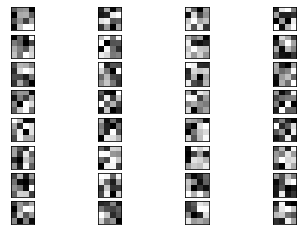

In [0]:
from matplotlib import pyplot

# # summarize filter shapes
# for layer in model.layers:
# 	# check for convolutional layer
# 	if 'conv' in layer.name:
# 	  # get filter weights
# 	  filters, biases = layer.get_weights()
   
# retrieve weights from the second hidden layer
filters, biases = model.layers[4].get_weights()

# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
# n_filters = outgoing channels
outgoing_channels = 2
n_filters, ix = outgoing_channels, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, :, i]
	# plot each channel separately
	# Range of incoming channels
	incoming_channels = 4
	for j in range(incoming_channels):
		# Range of Depth of the kernel .i.e. 3
		Depth = 4
		for k in range(Depth):
			# specify subplot and turn of axis
			ax = pyplot.subplot((outgoing_channels*Depth), incoming_channels, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			pyplot.imshow(f[:, :, k,j], cmap='gray')
			ix += 1
# show the figure
pyplot.show()

## Conv2D Visualization

In [0]:
# (1) Importing dependency
%tensorflow_version 1.x
import tensorflow as tf
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, Conv3D
from keras.layers.normalization import BatchNormalization
import numpy as np

np.random.seed(1000)
    
# (2) Get Data
import tflearn.datasets.oxflower17 as oxflower17
x, y = oxflower17.load_data(one_hot=True)
    
# (3) Create a sequential model
model = Sequential()
    
# 1st Convolutional Layer
model.add(Conv2D(filters=2, input_shape=(224,224,3), kernel_size=(3,3), strides=(4,4), padding='Same'))
model.add(Activation('relu'))
    
# 2nd Convolutional Layer
model.add(Conv2D(filters=4, kernel_size=(3,3), strides=(1,1), padding='Same'))
model.add(Activation('relu'))
    
# 3rd Convolutional Layer
model.add(Conv2D(filters=2, kernel_size=(3,3), strides=(1,1), padding='Same'))
model.add(Activation('relu'))

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(100))
model.add(Activation('relu'))

# Output Layer
model.add(Dense(17))
model.add(Activation('softmax'))

model.summary()

# (4) Compile 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epoch_gradient = []

def get_gradient_func(model):
    grads = K.gradients(model.total_loss, model.trainable_weights)
    inputs = model.model._feed_inputs + model.model._feed_targets + model.model._feed_sample_weights
    func = K.function(inputs, grads)
    return func

# Define the Required Callback Function
class GradientCalcCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
      get_gradient = get_gradient_func(model)
      grads = get_gradient([x, y, np.ones(len(y))])
      epoch_gradient.append(grads)
    
epoch = 4

model.fit(x, y, batch_size=64, epochs= epoch, verbose=1, validation_split=0.2, shuffle=True, callbacks=[GradientCalcCallback()])
    
# (7) Convert to a 2 dimensiaonal array of (epoch, gradients) type
gradient = np.asarray(epoch_gradient)
print("Total number of epochs run:", epoch)
print("Gradient Array has the shape:",gradient.shape)

TensorFlow 1.x selected.


Using TensorFlow backend.


100.0% 60276736 / 60270631


('Succesfully downloaded', '17flowers.tgz', 60270631, 'bytes.')
File Extracted
Starting to parse images...
Parsing Done!



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 56, 56, 2)         56        
_________________________________________________________________
activation_1 (Activation)    (None, 56, 56, 2)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 4)         76        
_________________________________________________________________
activation_2 (Activation)    (None, 56, 56, 4)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 56, 56, 2)         74        
_________________________________________________________________
activation_3 (Activation)    (None, 56, 56, 2)         0      

/usr/local/lib/python3.6/dist-packages/keras/engine/sequential.py:111: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '


Epoch 2/4
1088/1088 [==============================] - 1s 567us/step - loss: 2.7434 - acc: 0.2426 - val_loss: 2.7336 - val_acc: 0.1250


/usr/local/lib/python3.6/dist-packages/keras/engine/sequential.py:111: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '


Epoch 3/4
1088/1088 [==============================] - 1s 579us/step - loss: 2.2730 - acc: 0.4384 - val_loss: 2.4033 - val_acc: 0.2794


/usr/local/lib/python3.6/dist-packages/keras/engine/sequential.py:111: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '


Epoch 4/4
1088/1088 [==============================] - 1s 555us/step - loss: 1.3170 - acc: 0.6884 - val_loss: 2.2917 - val_acc: 0.2794


/usr/local/lib/python3.6/dist-packages/keras/engine/sequential.py:111: UserWarning: `Sequential.model` is deprecated. `Sequential` is a subclass of `Model`, you can just use your `Sequential` instance directly.
  warnings.warn('`Sequential.model` is deprecated. '


Total number of epochs run: 4
Gradient Array has the shape: (4, 10)


In [0]:
import numpy as np
x = model.layers[4].kernel
gr = tf.get_default_graph()

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    conv1_kernel_val = gr.get_tensor_by_name('conv1/kernel:0').eval()
    print(sess.run(x))

[[[[-0.07628679  0.31725606]
   [-0.29280648  0.10707554]
   [-0.1409379  -0.14117424]
   [-0.04934797 -0.17769067]]

  [[-0.22811215  0.2088342 ]
   [ 0.12845007 -0.10234594]
   [ 0.29518536  0.22939327]
   [-0.102254   -0.16633217]]

  [[ 0.23566589  0.06252447]
   [ 0.12485743 -0.2845057 ]
   [ 0.17910227 -0.09911792]
   [ 0.09142479 -0.17152238]]]


 [[[-0.23811015 -0.16541886]
   [-0.33333215 -0.13665256]
   [ 0.09643212  0.07662854]
   [ 0.05305314 -0.23696613]]

  [[ 0.0339109   0.16784325]
   [-0.04169551 -0.0482665 ]
   [ 0.08657351  0.12973014]
   [ 0.05880824  0.05947757]]

  [[ 0.11017862 -0.14729127]
   [ 0.2464253  -0.19549426]
   [-0.2609269   0.25060275]
   [-0.26333413 -0.13276713]]]


 [[[-0.06246376  0.0363799 ]
   [-0.02949128  0.32878068]
   [ 0.15073076 -0.30452785]
   [-0.24252614 -0.09735529]]

  [[ 0.23945466  0.01562142]
   [ 0.22383246  0.09923801]
   [-0.2536789  -0.09304142]
   [-0.22144732  0.3057051 ]]

  [[ 0.05687061 -0.2811746 ]
   [-0.2436115  -0.1616

In [0]:
# summarize filter shapes
for layer in model.layers:
	# check for convolutional layer
	if 'conv' in layer.name:
	  # get filter weights
	  filters, biases = layer.get_weights()
	  print(layer.name, filters.shape)
	 
#print(filters[:,:,:,0])

conv2d_4 (3, 3, 3, 2)
conv2d_5 (3, 3, 2, 4)
conv2d_6 (3, 3, 4, 2)


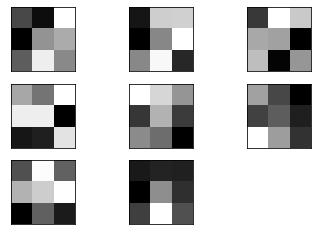

In [0]:
from matplotlib import pyplot

# # summarize filter shapes
# for layer in model.layers:
# 	# check for convolutional layer
# 	if 'conv' in layer.name:
# 	  # get filter weights
# 	  filters, biases = layer.get_weights()
   
# retrieve weights from the second hidden layer
filters, biases = model.layers[4].get_weights()

# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
# n_filters = outgoing filters
n_filters, ix = 2, 1 
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	#print(f)
	# plot each channel separately
	# Range of incoming filters
	for j in range(4):
		# specify subplot and turn of axis
		ax = pyplot.subplot(3, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(f[:, :, j], cmap='gray')
	  #print(f[:, :, j])
		ix += 1
# show the figure
pyplot.show()

## Visualizing the Filters


553467904/553467096 [==============================] - 12s 0us/step


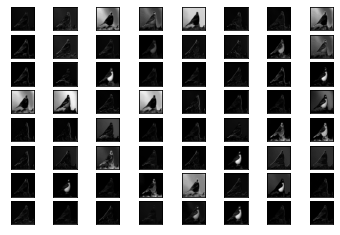

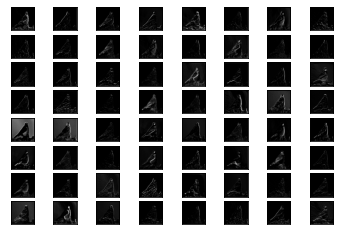

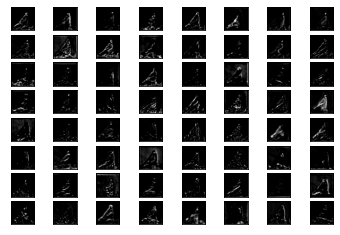

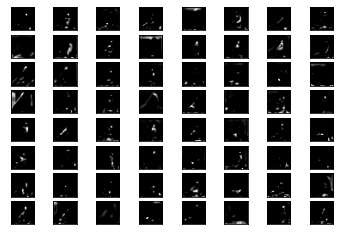

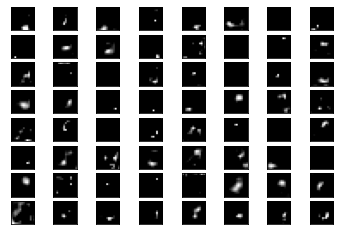

In [0]:
# visualize feature maps output from each block in the vgg model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims

# load the model
model = VGG16()

# redefine model to output right after the first hidden layer
ixs = [2, 5, 9, 13, 17]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)

# load the image with the required shape
img = load_img('/content/bird.jpg', target_size=(224, 224))

# convert the image to an array
img = img_to_array(img)

# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)

# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)

# get feature map for first hidden layer
feature_maps = model.predict(img)

# plot the output from each block
square = 8
for fmap in feature_maps:
	# plot all 64 maps in an 8x8 squares
	ix = 1
	for _ in range(square):
		for _ in range(square):
			# specify subplot and turn of axis
			ax = pyplot.subplot(square, square, ix)
			ax.set_xticks([])
			ax.set_yticks([])
			# plot filter channel in grayscale
			pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
			ix += 1
	# show the figure
	pyplot.show()

# Tensorflow Reduce_max
https://stackoverflow.com/questions/60277848/tensorflow-reduce-max-for-different-dimensions

In [0]:
%tensorflow_version 2.x
import tensorflow as tf

# Create a Ragged Tensor of variable length
rt = tf.ragged.constant([[9, 8, 7], [], [6, 5], [4]])
print("Ragged Tensor:","\n",rt,"\n")

# Convert to Tensor to have same length
rt = rt.to_tensor()
print("Tensor of same length:","\n",rt,"\n")

# Apply reduce_max to get the max value along axis=1
rt = tf.reduce_max(rt, axis=1)
print("Reduce Max Tensor:","\n",rt,"\n")

Ragged Tensor: 
 <tf.RaggedTensor [[9, 8, 7], [], [6, 5], [4]]> 

Tensor of same length: 
 tf.Tensor(
[[9 8 7]
 [0 0 0]
 [6 5 0]
 [4 0 0]], shape=(4, 3), dtype=int32) 

Reduce Max Tensor: 
 tf.Tensor([9 0 6 4], shape=(4,), dtype=int32) 



# Save and Load Model using Keras
https://stackoverflow.com/questions/60198878/proper-way-to-save-model-in-keras

Good Article for Load and Save in Keras - https://machinelearningmastery.com/save-load-keras-deep-learning-models/

## Build and Save the Model

In [0]:
%tensorflow_version 2.x
# MLP for Pima Indians Dataset saved to single file
import numpy as np
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

# load pima indians dataset
dataset = np.loadtxt("/content/pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# define model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model Summary
#model.summary()

# Fit the model
model.fit(X, Y, epochs=150, batch_size=10, verbose=0)

# evaluate the model
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# save model and architecture to single file
model.save("model.h5")
print("Saved model to disk")

TensorFlow is already loaded. Please restart the runtime to change versions.
accuracy: 75.39%
Saved model to disk


## Load the Model

In [0]:
# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model
 
# load model
model = load_model('model.h5')

# summarize model.
model.summary()

# load dataset
dataset = loadtxt("pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# evaluate the model
score = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
accuracy: 75.78%


# Feed Dict Example


In [0]:
%tensorflow_version 1.x
import tensorflow as tf

x = tf.placeholder(tf.float32)
y = x * 42

with tf.Session() as sess:
  train_accuracy = y.eval(session=sess,feed_dict={x: (2, 4)})
  print(train_accuracy)

[ 84. 168.]


# Dealing with Session Error Explained
https://stackoverflow.com/questions/61006702/cannot-use-the-given-session-to-evaluate-tensor-the-tensors-graph-is-different

## Simple Error and Fix 

In [0]:
%tensorflow_version 1.x
import tensorflow as tf

g = tf.Graph()
with g.as_default():
  x = tf.constant(1.0)  # x is created in graph g

s = tf.Session(graph=g)
with s.as_default() as sess:
  print(x.eval()) # x was created in graph g and it is evaluated in session s
                  # which is tied to graph g, so everything is ok.
  y = tf.constant(2.0) # y is created in TensorFlow's default graph!!!
  print(y.eval()) # y was created in TF's default graph, but it is evaluated in
                  # session s which is tied to graph g => ERROR

1.0


ValueError: ignored

In [0]:
%tensorflow_version 1.x
import tensorflow as tf

g = tf.Graph()
with g.as_default():
  x = tf.constant(1.0)  # x is created in graph g
  y = tf.constant(2.0) # y is created in graph g

s = tf.Session(graph=g)
with s.as_default() as sess:
  print(x.eval()) # x was created in graph g and it is evaluated in session s
                         # which is tied to graph g, so everything is ok.
  print(y.eval()) # y was created in graph g and it is evaluated in session s
                         # which is tied to graph g, so everything is ok.

1.0
2.0


## Error and Fix Explained in Detail

### Error with default session and using variable created in another graph

In [0]:
%tensorflow_version 1.x
import tensorflow as tf

g = tf.Graph()
with g.as_default():
  x = tf.constant(1.0)  # x is created in graph g

with tf.Session().as_default() as sess:
  y = tf.constant(2.0) # y is created in TensorFlow's default graph!!!
  print(y.eval(session=sess)) # y was created in TF's default graph, and is evaluated in
                  # default session, so everything is ok.  
  print(x.eval(session=sess)) # x was created in graph g and it is evaluated in session s
                  # which is tied to graph g, but it is evaluated in
                  # session s which is tied to graph g => ERROR

2.0


ValueError: ignored

### Error with graph session as default and using variable created in default graph

In [0]:
%tensorflow_version 1.x
import tensorflow as tf

g = tf.Graph()
with g.as_default():
  x = tf.constant(1.0)  # x is created in graph g

with tf.Session(graph=g).as_default() as sess:
  print(x.eval(session=sess)) # x was created in graph g and it is evaluated in session s
                         # which is tied to graph g, so everything is ok.
  y = tf.constant(2.0) # y is created in TensorFlow's default graph!!!
  print(y.eval()) # y was created in TF's default graph, but it is evaluated in
                  # session s which is tied to graph g => ERROR

1.0


ValueError: ignored

### Error with graph session as default and using variable created in default graph and also session=sess

In [0]:
%tensorflow_version 1.x
import tensorflow as tf

g = tf.Graph()
with g.as_default():
  x = tf.constant(1.0)  # x is created in graph g

with tf.Session(graph=g).as_default() as sess:
  print(x.eval(session=sess)) # x was created in graph g and it is evaluated in session s
                         # which is tied to graph g, so everything is ok.
  y = tf.constant(2.0) # y is created in TensorFlow's default graph!!!
  print(y.eval(session=sess)) # y was created in TF's default graph, but it is evaluated in
                  # session s which is tied to graph g => ERROR

1.0


ValueError: ignored

### Fix with default session and variable not assigned to any graph

In [0]:
%tensorflow_version 1.x
import tensorflow as tf

x = tf.constant(1.0)  # x is in not assigned to any graph

with tf.Session().as_default() as sess:
  y = tf.constant(2.0) # y is created in TensorFlow's default graph!!!
  print(y.eval(session=sess)) # y was created in TF's default graph, and is evaluated in
                  # default session, so everything is ok.  
  print(x.eval(session=sess)) # x not assigned to any graph, and is evaluated in
                  # default session, so everything is ok.  

2.0
1.0


### The best fix is to cleanly separate the construction phase and the execution phase

In [0]:
import tensorflow as tf

g = tf.Graph()
with g.as_default():
  x = tf.constant(1.0)  # x is created in graph g
  y = tf.constant(2.0) # y is created in graph g

with tf.Session(graph=g).as_default() as sess:
  print(x.eval()) # x was created in graph g and it is evaluated in session s
                         # which is tied to graph g, so everything is ok.
  print(y.eval()) # y was created in graph g and it is evaluated in session s
                         # which is tied to graph g, so everything is ok.

1.0
2.0


# softmax, log_softmax and sigmoid
https://stackoverflow.com/questions/59129169/some-clarification-about-what-an-image-recognition-cnn-should-return-on-predicti/61389763#61389763


In [0]:
%tensorflow_version 1.x
import tensorflow as tf
x = tf.nn.softmax([0.12345,0.3256,0.2356,-0.3256,0.13562])
y = tf.nn.log_softmax([0.12345,0.3256,0.2356,-0.3256,0.13562])

x1 = tf.nn.softmax([1.0, 2.0, 3.0, 4.0, 5.0])
y1 = tf.nn.log_softmax([1.0, 2.0, 3.0, 4.0, 5.0])

with tf.Session() as sess:
   print(x.eval())
   print(y.eval())
   print(x1.eval())
   print(y1.eval())   

[0.20027274 0.24514017 0.22404124 0.12782091 0.20272495]
[-1.6080751 -1.4059252 -1.4959252 -2.057125  -1.5959052]
[0.01165623 0.03168492 0.08612854 0.23412165 0.6364086 ]
[-4.4519143 -3.4519143 -2.4519143 -1.4519144 -0.4519144]


In [0]:
%tensorflow_version 1.x
import tensorflow as tf
import numpy as np

# Assume below is the input to last layer
Input = tf.constant(np.array([[0.1, 0.3, 0.5, 1.5]]))

with tf.Session() as sess:
   # Computes softmax activations. softmax = tf.exp(logits) / tf.reduce_sum(tf.exp(logits), axis)
   # Output sums upto 1, as this is the probability
   print(tf.nn.softmax(Input).eval()) 

   # Computes log softmax activations.For each batch i and class j we have logsoftmax = logits - log(reduce_sum(exp(logits), axis))
   # Gives log(softmax(input)) as output which is log likelihood and value doesn't sum up to 1.
   print(tf.nn.log_softmax(Input).eval()) 

   # Manual computation of log_softmax
   a = tf.nn.softmax(Input).eval()
   b = np.array(a)
   print(np.log(b))

   # Computes sigmoid of x element-wise. Specifically, y = 1 / (1 + exp(-x)).
   print(tf.nn.sigmoid(Input).eval())  

[[0.12872618 0.15722651 0.1920369  0.52201041]]
[[-2.05006775 -1.85006775 -1.65006775 -0.65006775]]
[[-2.05006775 -1.85006775 -1.65006775 -0.65006775]]
[[0.52497919 0.57444252 0.62245933 0.81757448]]


# Tensor to array
https://stackoverflow.com/questions/59875172/typeerror-when-trying-to-use-earlystopping-with-f1-metric-as-stopping-criterion

In [0]:
%tensorflow_version 1.x
print(tf.__version__)
import tensorflow as tf
import numpy as np

x = tf.constant([1,2,3,4,5,6])
print("Type of x:",x)

with tf.Session() as sess:
  y = np.array(x.eval())
  print("Type of y:",y.shape,y)

1.15.2
Type of x: Tensor("Const_24:0", shape=(6,), dtype=int32)
Type of y: (6,) [1 2 3 4 5 6]


# Fit_generator simple example.

https://stackoverflow.com/questions/59417210/keras-losing-axis-with-brightness-range-during-image-augmentation


Also example on hanling list. You can find it during Visualization where I have mulitplied list value by 100.

https://stackoverflow.com/questions/61080410/cnn-accuracy-y-axis-range

68608000/68606236 [==============================] - 1s 0us/step
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
15/15 [==============================] - 10s 689ms/step - loss: 0.9475 - accuracy: 0.5068 - val_loss: 0.6932 - val_accuracy: 0.5022
Epoch 2/15
15/15 [==============================] - 11s 700ms/step - loss: 0.6876 - accuracy: 0.5021 - val_loss: 0.6813 - val_accuracy: 0.4955
Epoch 3/15
15/15 [==============================] - 11s 733ms/step - loss: 0.6599 - accuracy: 0.5529 - val_loss: 0.6421 - val_accuracy: 0.6105
Epoch 4/15
15/15 [==============================] - 11s 748ms/step - loss: 0.6041 - accuracy: 0.6480 - val_loss: 0.6185 - val_accuracy: 0.6920
Epoch 5/15
15/15 [==============================] - 10s 697ms/step - loss: 0.5682 - accuracy: 0.6843 - val_loss: 0.6029 - val_accuracy: 0.6540
Epoch 6/15
15/15 [==============================] - 11s 707m

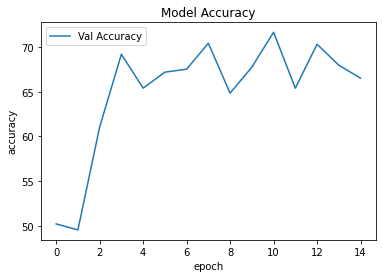

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

import os
import numpy as np
import matplotlib.pyplot as plt

_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

train_image_generator = ImageDataGenerator(rescale=1./255,brightness_range=[0.5,1.5]) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255,brightness_range=[0.5,1.5]) # Generator for our validation data

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

model.compile(optimizer="adam", 
          loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
          metrics=['accuracy'])

history = model.fit_generator(
          train_data_gen,
          steps_per_epoch=total_train // batch_size,
          epochs=epochs,
          validation_data=val_data_gen,
          validation_steps=total_val // batch_size)

val_accuracy = [i * 100 for i in history.history['val_accuracy']]
plt.plot(val_accuracy)
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Val Accuracy'], loc='upper left')
plt.show()

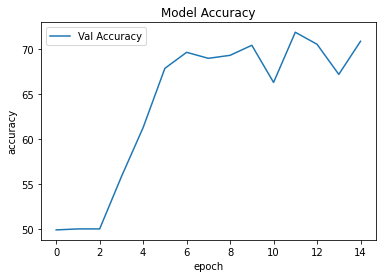

In [0]:
val_accuracy = [i * 100 for i in history.history['val_accuracy']]
plt.plot(val_accuracy)
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Val Accuracy'], loc='upper left')
plt.show()

# Convert Functional Model to Sequential and Vice Versa
https://stackoverflow.com/questions/61130836/convert-functional-model-to-sequential-keras

## User Code has one functional model and another sequential model

In [0]:
import tensorflow as tf
from tensorflow.python.keras import layers, models, applications, Input, Model
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, UpSampling2D

#load in data using imagedatagenreator
input_img = Input(shape=(128, 128,3))

x = Convolution2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Convolution2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Convolution2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (8, 4, 4) i.e. 128-dimensional
x = Convolution2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Convolution2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Convolution2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Convolution2D(3, (3, 3), activation='sigmoid', padding='same')(x)

#compile and run

##save weights and and model start conv network with these weights
encoder = Model(input_img, encoded)
encoder.save('Encoded.h5')

In [0]:
import tensorflow as tf
from tensorflow.python.keras import layers, models, applications, Input, Model, Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, UpSampling2D, Conv2D, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.models import load_model

#load in data using imagedatagenreator
x = load_model('Encoded.h5')
x.summary()

model = Sequential()
model.add(encoded)
model.add(Conv2D(64,(3,3), input_shape=(424,424,3), activation='relu'))#3x3 is default
model.add(MaxPooling2D(pool_size=(3,3)))
#model.add(Dropout(.1))#test
model.add(Dense(32, activation='relu'))#test
model.add(Conv2D(64,(3,3), activation='relu'))#input_shape=(424,424,3)
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.3))#test
model.add(Conv2D(64,(3,3), activation='relu'))#input_shape=(424,424,3)
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(.3))
model.add(Flatten(input_shape=(424,424,3)))
model.add(BatchNormalization())
model.add(Dense(2, activation='softmax'))

model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d_87 (Conv2D)           (None, 128, 128, 16)      448       
_________________________________________________________________
max_pooling2d_72 (MaxPooling (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 64, 64, 8)         1160      
_________________________________________________________________
max_pooling2d_73 (MaxPooling (None, 32, 32, 8)         0         
_________________________________________________________________
conv2d_89 (Conv2D)           (None, 32, 32, 8)         584       
_________________________________________________________________
max_pooling2d_74 (MaxPooling (None, 16, 16, 8)         0   

TypeError: ignored

## Convert functional model to sequential model

In [0]:
import tensorflow as tf
from tensorflow.python.keras import layers, models, applications, Input, Model
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, UpSampling2D

# Create the Sequential Model
model = Sequential()
model.add(Convolution2D(16, (3, 3), input_shape=(424,424,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Convolution2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Convolution2D(8, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), padding='same'))

# Model summary
model.summary()

# Save the Model and Architecture
model.save('Encoded.h5')

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 424, 424, 16)      448       
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 212, 212, 16)      0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 212, 212, 8)       1160      
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 106, 106, 8)       0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 106, 106, 8)       584       
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 53, 53, 8)         0         
Total params: 2,192
Trainable params: 2,192
Non-trainable params: 0
____________________________________________________

In [0]:
import tensorflow as tf
from tensorflow.python.keras import layers, models, applications, Input, Model, Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, UpSampling2D, Conv2D, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.models import load_model

# Load the previoulsy saved enocdermodel 
model = load_model('Encoded.h5')

# Add the additonal layers 
model.add(Conv2D(64,(3,3), activation='relu'))#3x3 is default
model.add(MaxPooling2D(pool_size=(3,3)))
#model.add(Dropout(.1))#test
model.add(Dense(32, activation='relu'))#test
model.add(Conv2D(64,(3,3), activation='relu'))#input_shape=(424,424,3)
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.3))#test
model.add(Conv2D(64,(3,3), activation='relu'))#input_shape=(424,424,3)
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(.3))
model.add(Flatten(input_shape=(424,424,3)))
model.add(BatchNormalization())
model.add(Dense(2, activation='softmax'))

# Model summary 
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_60 (Conv2D)           (None, 424, 424, 16)      448       
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 212, 212, 16)      0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 212, 212, 8)       1160      
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 106, 106, 8)       0         
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 106, 106, 8)       584       
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 53, 53, 8)         0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 51, 51, 64)       

## Convert sequential model to functional model

In [0]:
import tensorflow as tf
from tensorflow.python.keras import layers, models, applications, Input, Model
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, UpSampling2D

#load in data using imagedatagenreator
input_img = Input(shape=(424,424,3))

x = Convolution2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Convolution2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Convolution2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

##save weights and and model start conv network with these weights
encoder = Model(input_img, encoded)

# Model Summary
encoder.summary()

encoder.save('Encoded.h5')

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 424, 424, 3)]     0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 424, 424, 16)      448       
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 212, 212, 16)      0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 212, 212, 8)       1160      
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 106, 106, 8)       0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 106, 106, 8)       584       
_________________________________________________________________
max_pooling2d_53 (MaxPooling (None, 53, 53, 8)         0   

In [0]:
import tensorflow as tf
from tensorflow.python.keras import layers, models, applications, Input, Model, Sequential
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, UpSampling2D, Conv2D, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.models import load_model

# Load the previoulsy saved enocdermodel 
load_model('Encoded.h5')

# Add the additonal layers 
x = Convolution2D(64,(3,3), activation='relu')(encoded)#3x3 is default
x = MaxPooling2D(pool_size=(3,3))(x)
#model.add(Dropout(.1))#test
x = Dense(32, activation='relu')(x)#test
x = Conv2D(64,(3,3), activation='relu')(x)#input_shape=(424,424,3)
x = MaxPooling2D(pool_size=(3,3))(x)
x = Dense(64, activation='relu')(x)
x = Dropout(.3)(x)#test
x = Conv2D(64,(3,3), activation='relu')(x)#input_shape=(424,424,3)
x = MaxPooling2D(pool_size=(3,3))(x)
x = Dropout(.3)(x)
x = Flatten(input_shape=(424,424,3))(x)
x = BatchNormalization()(x)
output = Dense(2, activation='softmax')(x)

##save weights and and model start conv network with these weights
model = Model(input_img, output)

# Model summary 
model.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 424, 424, 3)]     0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 424, 424, 16)      448       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 212, 212, 16)      0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 212, 212, 8)       1160      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 106, 106, 8)       0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 106, 106, 8)       584       
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 53, 53, 8)         0   

# Custom Loss Function Example
https://stackoverflow.com/questions/59415275/custom-metric-in-multi-output-keras-model

In [0]:
import numpy as np

# Define custom loss
# Create a loss function that adds the MSE loss to the mean of all squared activations
def custom_loss(y_pred1, y_true1, y_pred2, y_true2):
    Loss = 0

    def loss1(y_true1,y_pred1):
        return np.square(np.subtract(y_true1,y_pred1)).mean()

    def loss2(y_true2,y_pred2):
        return np.square(np.subtract(y_true2,y_pred2)).mean()

    def finalloss(y_pred1, y_true1, y_pred2, y_true2):
        Loss = loss1(y_pred1, y_true1) + loss2(y_pred2, y_true2)
        if(y_pred1 == y_true1 and y_pred2 == y_true2):
           return(0)
        elif(y_pred1 == y_true1 and y_pred2 != y_true2):
            return(0.5 * Loss)
        elif(y_pred1 != y_true1 and y_pred2 == y_true2):
            return(0.5 * Loss)    
        else:
            return(Loss)
    
    return finalloss(y_pred1, y_true1, y_pred2, y_true2)

In [0]:
custom_loss(1,1,7,2)

12.5

# Layer Concatentation
https://stackoverflow.com/questions/59470195/how-to-achieve-elementwise-convolution-for-two-tensors-using-tensorflow/61206149#61206149

In [0]:
import tensorflow.keras.backend as K
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, concatenate, Conv2D, ZeroPadding2D, Dense
from tensorflow.keras.optimizers import Adagrad

input_img1 = Input(shape=(44,44,3))
x1 = Conv2D(3, (3, 3), activation='relu', padding='same')(input_img1)

input_img2 = Input(shape=(34,34,3))
x2 = Conv2D(3, (3, 3), activation='relu', padding='same')(input_img2)
# Zero Padding of 5 at the top, bottom, left and right side of an image tensor
x3 = ZeroPadding2D(padding = (5,5))(x2)

# Concatenate works as layers have same size output
x4 = concatenate([x1,x3])

output = Dense(18, activation='relu')(x4)

model = Model(inputs=[input_img1,input_img2], outputs=output)

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 34, 34, 3)]  0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 44, 44, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_3 (Conv2D)               (None, 34, 34, 3)    84          input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 44, 44, 3)    84          input_3[0][0]                    
______________________________________________________________________________________________

In [0]:
from keras.models import Model
from keras.layers import Concatenate, Dense, LSTM, Input, concatenate
from keras.optimizers import Adagrad

first_input = Input(shape=(5, ))
first_dense = Dense(8, )(first_input)

second_input = Input(shape=(2, ))
second_dense = Dense(1, )(second_input)

merge_one = concatenate([first_dense, second_dense])

third_input = Input(shape=(1, ))
merge_two = concatenate([merge_one, third_input])

model = Model(inputs=[first_input, second_input, third_input], outputs=merge_two)
model.summary()
ada_grad = Adagrad(lr=0.1, epsilon=1e-08, decay=0.0)
model.compile(optimizer=ada_grad, loss='binary_crossentropy',
               metrics=['accuracy'])

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_21 (InputLayer)           (None, 5)            0                                            
__________________________________________________________________________________________________
input_22 (InputLayer)           (None, 2)            0                                            
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 8)            48          input_21[0][0]                   
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 1)            3           input_22[0][0]                   
____________________________________________________________________________________________

# Simple CNN Model
https://stackoverflow.com/questions/59211403/find-the-output-node-in-a-alexnet-implementation-in-tensorflow

In [0]:
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.models import load_model


# Add the layers 
model = Sequential()
model.add(Conv2D(64,(3,3), input_shape=(424,424,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dense(32, activation='relu'))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(.3))#test
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(.3))
model.add(Flatten(input_shape=(424,424,3)))
model.add(BatchNormalization())
model.add(Dense(2, activation='softmax'))

# Model summary 
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 422, 422, 64)      1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 140, 140, 64)      0         
_________________________________________________________________
dense_3 (Dense)              (None, 140, 140, 32)      2080      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 138, 138, 64)      18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 46, 46, 64)        0         
_________________________________________________________________
dense_4 (Dense)              (None, 46, 46, 64)        4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 46, 46, 64)      

In [0]:
# To print all the layers of the Model
print("All the Layers of the Model:")
for layers in model.layers:
    print(layers)
print("\n")

# To print first layer OR Input layer of the Model
print("Input Layer of the Model:","\n",model.layers[0],"\n")

# To print last layer OR Output layer of the Model
print("Output Layer of the Model:","\n",model.layers[-1])

All the Layers of the Model:


Input Layer of the Model: 

Output Layer of the Model: 


# Build, Save and Load the Model using Tensorflow
https://stackoverflow.com/questions/57320623/how-to-load-a-pre-trained-cnn-model-in-tensorflow-and-test-the-results-with-unkn

In [0]:
%tensorflow_version 1.x
print(tf.__version__)
# MLP for Pima Indians Dataset saved to single file
import numpy as np
from numpy import loadtxt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# load pima indians dataset
dataset = np.loadtxt("/content/pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# define model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model Summary
model.summary()

# Fit the model
model.fit(X, Y, epochs=150, batch_size=10, verbose=0)

# evaluate the model
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# save model and architecture to single file
model.save("model.h5")
print("Saved model to disk")

1.15.2
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
acc: 74.87%
Saved model to disk


In [0]:
# load and evaluate a saved model
import tensorflow as tf
from numpy import loadtxt
from tensorflow.keras.models import load_model
 
# load model
model = load_model('model.h5')

# summarize model
model.summary()

# LOAD THE NEW DATASET HERE
dataset = loadtxt("pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# evaluate the model
score = model.predict(X,verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3_input (InputLayer)   [(None, 8)]               0         
_________________________________________________________________
dense_3 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 104       
Total params: 212
Trainable params: 212
Non-trainable params: 0
_________________________________________________________________


# Callbacks with Kernel Visualization for Tensorflow

https://stackoverflow.com/questions/56921769/how-we-can-implement-gradient-based-neural-network-visualization-using-tensorflo

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_87 (Conv2D)           (None, 224, 224, 5)       140       
_________________________________________________________________
activation_145 (Activation)  (None, 224, 224, 5)       0         
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 112, 112, 5)       0         
_________________________________________________________________
batch_normalization_24 (Batc (None, 112, 112, 5)       20        
_________________________________________________________________
conv2d_88 (Conv2D)           (None, 112, 112, 10)      460       
_________________________________________________________________
activation_146 (Activation)  (None, 112, 112, 10)      0         
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 56, 56, 10)      

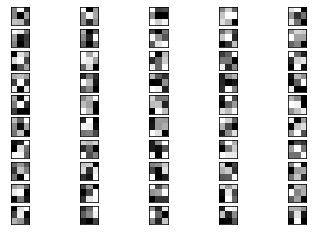

1088/1088 [==============================] - 9s 8ms/sample - loss: 2.7977 - acc: 0.1121 - val_loss: 2.8206 - val_acc: 0.1250
Epoch 2/4
 960/1088 [=========================>....] - ETA: 0s - loss: 2.5060 - acc: 0.1979
 Calculating Gradient for Epoch  2

 Visualizing the kernels for Layer 5 of the Model for Epoch  2


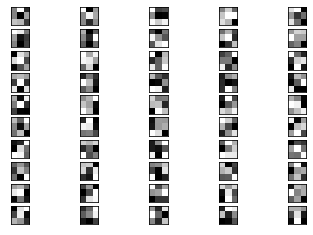

1088/1088 [==============================] - 6s 5ms/sample - loss: 2.5227 - acc: 0.1921 - val_loss: 2.8027 - val_acc: 0.1140
Epoch 3/4
 960/1088 [=========================>....] - ETA: 0s - loss: 2.3459 - acc: 0.2583
 Calculating Gradient for Epoch  3

 Visualizing the kernels for Layer 5 of the Model for Epoch  3


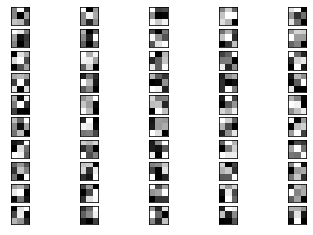

1088/1088 [==============================] - 5s 5ms/sample - loss: 2.3493 - acc: 0.2592 - val_loss: 2.7985 - val_acc: 0.0956
Epoch 4/4
 960/1088 [=========================>....] - ETA: 0s - loss: 2.1954 - acc: 0.3063
 Calculating Gradient for Epoch  4

 Visualizing the kernels for Layer 5 of the Model for Epoch  4


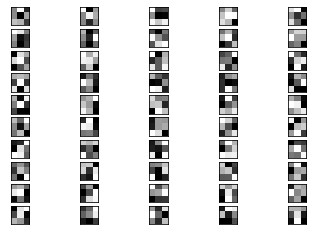

1088/1088 [==============================] - 6s 5ms/sample - loss: 2.1978 - acc: 0.3006 - val_loss: 2.8202 - val_acc: 0.0551
Shape of the Captured Gradient Array : (4, 16)


In [0]:
# Importing dependency
%tensorflow_version 1.x
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
import numpy as np
from matplotlib import pyplot

np.random.seed(1000)
    
# Get Data
import tflearn.datasets.oxflower17 as oxflower17
x, y = oxflower17.load_data(one_hot=True)
    
# Create a sequential model
model = Sequential()
    
# 1st Convolutional Layer
model.add(Conv2D(filters=5, input_shape=(224,224,3), kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())
    
# 2nd Convolutional Layer
model.add(Conv2D(filters=10, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())
    
# 3rd Convolutional Layer
model.add(Conv2D(filters=5, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())
    
# Passing it to a dense layer
model.add(Flatten())

# 1st Dense Layer
model.add(Dense(5, input_shape=(224*224*3,)))
model.add(Activation('relu'))

# Output Layer
model.add(Dense(17))
model.add(Activation('softmax'))

model.summary()

# Compile 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epoch_gradient = []
epoch_count = 0

def get_gradient_func(model):
    grads = K.gradients(model.total_loss, model.trainable_weights)
    inputs = model._feed_inputs + model._feed_targets + model._feed_sample_weights
    func = K.function(inputs, grads)
    return func

# Define the Required Callback Function
class GradientCalcCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
      print("\n","Calculating Gradient for Epoch ",(epoch+1))
      get_gradient = get_gradient_func(model)
      grads = get_gradient([x, y, np.ones(len(y))])
      epoch_gradient.append(grads)

      # Visualize the Kernels for Layer 5 of the Model
      print("\n","Visualizing the kernels for Layer 5 of the Model for Epoch ",(epoch+1))  
      # retrieve weights from the second hidden layer
      filters, biases = model.layers[4].get_weights()
      # normalize filter values to 0-1 so we can visualize them
      f_min, f_max = filters.min(), filters.max()
      filters = (filters - f_min) / (f_max - f_min)
      # plot all the filters
      # n_filters = outgoing filters
      n_filters, ix = 10, 1 
      for i in range(n_filters):
      	# get the filter
      	f = filters[:, :, :, i]
      	# Range of incoming filters
      	for j in range(5):
      		# specify subplot and turn of axis
      		ax = pyplot.subplot(10, 5, ix)
      		ax.set_xticks([])
      		ax.set_yticks([])
      		# plot filter channel in grayscale
      		pyplot.imshow(f[:, :, j], cmap='gray')
      		ix += 1
      # show the figure
      pyplot.show()
    
epoch = 4

model.fit(x, y, batch_size=64, epochs= epoch, verbose=1, validation_split=0.2, shuffle=True, callbacks=[GradientCalcCallback()])

# Convert to a array
gradient = np.asarray(epoch_gradient)
print("Shape of the Captured Gradient Array :",gradient.shape)

In [0]:
# summarize filter shapes
for layer in model.layers:
	# check for convolutional layer
	if 'conv' in layer.name:
	  # get filter weights
	  filters, biases = layer.get_weights()
	  print(layer.name, filters.shape)
	 
#print(biases)

conv2d_3 (3, 3, 3, 5)
conv2d_4 (3, 3, 5, 10)
conv2d_5 (3, 3, 10, 5)


# Gradient Calculation using tf.grandienttape
https://stackoverflow.com/questions/59447329/how-to-compute-final-gradients-from-multiple-intermediate-gradients-in-neural-ne

Answer - https://stackoverflow.com/questions/57759635/get-gradients-with-keras-tensorflow-2-0

In [0]:
%tensorflow_version 1.x
# Get Data
import tflearn.datasets.oxflower17 as oxflower17
x, y = oxflower17.load_data(one_hot=True)

In [0]:
x = tf.convert_to_tensor(x)
y = tf.convert_to_tensor(y)

In [0]:
# Importing dependency
%tensorflow_version 2.x
import tensorflow as tf
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
import numpy as np
from matplotlib import pyplot
import math

# Hyperparameters
batch_size = 128
epochs = 50
#optimizer = Adam(lr=0.001)
#weight_init = RandomNormal()
    
bs = 5
text_len_1 = 772
text_len_2 = 741
embed_size = 300
in_channels = 1

# Create a sequential model
model = Sequential()

model.add(Conv2D(filters=10, kernel_size=(2, embed_size),
                                                    dilation_rate=(dilation, 1),
                                                    padding='valid'))
# 1st Convolutional Layer
model.add(Conv2D(filters=5, input_shape=(224,224,3), kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())
    
# 2nd Convolutional Layer
model.add(Conv2D(filters=10, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())
    
# 3rd Convolutional Layer
model.add(Conv2D(filters=5, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())
    
# Passing it to a dense layer
model.add(Flatten())

# 1st Dense Layer
model.add(Dense(5, input_shape=(224*224*3,)))
model.add(Activation('relu'))

# Output Layer
model.add(Dense(17))
model.add(Activation('softmax'))

# Compile 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x, y, batch_size=64, epochs= epoch, verbose=1, validation_split=0.2, shuffle=True)

with tf.GradientTape() as tape:
    preds = model(x)

grads = tape.gradient(preds, model.trainable_variables)
print(grads)


#model.summary()

# def step(real_x, real_y):
#     with tf.GradientTape() as tape:
#         # Make prediction
#         pred_y = model(x)
#         # Calculate loss
#         model_loss = tf.keras.losses.categorical_crossentropy(real_y, pred_y)
    
#     # Calculate gradients
#     model_gradients = tape.gradient(model_loss, model.trainable_variables)
#     # Update model
#     optimizer.apply_gradients(zip(model_gradients, model.trainable_variables))

# # Training loop
# bat_per_epoch = math.floor(x.shape / batch_size)
# for epoch in range(epochs):
#     print('=', end='')
#     for i in range(bat_per_epoch):
#         n = i*batch_size
#         step(x[n:n+batch_size], y[n:n+batch_size])

# # Calculate accuracy
# # Compile 
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# #model.compile(optimizer=optimizer, loss=tf.keras.losses.categorical_crossentropy, metrics=['acc']) # Compile just for evaluation
# #print('\n', model.evaluate(x_test, y_test, verbose=0)[1])


In [0]:
print(grads.shape)

NameError: ignored

# MobileNetV2 with Statistics
https://stackoverflow.com/questions/58868086/validation-loss-and-validation-accuracy-curve-fluctuating/61360288#61360288

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from keras.utils.layer_utils import count_params

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False)

#base_model.summary()
trainable_count = count_params(base_model.trainable_weights)
non_trainable_count = count_params(base_model.non_trainable_weights)
print("\n",color.BOLD + '  base_model Statistics !' + color.END)
print("Trainable Parameters :", color.BOLD + str(trainable_count) + color.END)
print("Non Trainable Parameters :", non_trainable_count,"\n")

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1025, activation='relu')(x)
x = Dense(1025, activation='relu')(x)
x = Dense(512, activation='relu')(x)
preds = Dense(3, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=preds)

#model.summary()
trainable_count = count_params(model.trainable_weights)
non_trainable_count = count_params(model.non_trainable_weights)
print(color.BOLD + '    model Statistics !' + color.END)
print("Trainable Parameters :", color.BOLD + str(trainable_count) + color.END)
print("Non Trainable Parameters :", non_trainable_count,"\n")

new_weights_added = count_params(model.trainable_weights) - count_params(base_model.trainable_weights)
print("Additional trainable weights added to the model excluding basel model trainable weights :", color.BOLD + str(new_weights_added) + color.END)


   base_model Statistics !
Trainable Parameters : 2223872
Non Trainable Parameters : 34112 

    model Statistics !
Trainable Parameters : 5115398
Non Trainable Parameters : 34112 

Additional trainable weights added to the model excluding basel model trainable weights : 2891526


In [0]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  155


# Simple CNN + LSTM Model
https://stackoverflow.com/questions/58182882/cnn-lstm-model

In [0]:
# Importing dependency
%tensorflow_version 1.x
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Conv2D, TimeDistributed, LSTM, MaxPooling2D, Flatten, Dense
import numpy as np
from matplotlib import pyplot
import math

model = Sequential()
model.add(TimeDistributed(Conv2D(32, 5, 5,input_shape=(100,6,5,1))))
model.add(TimeDistributed(MaxPooling2D(pool_size=(4, 4))))
model.add(Activation('relu'))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(100, return_sequences=True))
model.add(TimeDistributed(Dense(5)))  

model.compile(loss='mae', optimizer='adam', metrics=['accuracy'])

# VGG16 Model Example


In [0]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Flatten
from keras.utils.layer_utils import count_params

resnet50_imagenet_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3),
                           pooling='avg')
resnet50_imagenet_model.output

x = resnet50_imagenet_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dense(12, activation='softmax')(x)
model = Model(inputs = resnet50_imagenet_model.input, outputs = x)

count=0
#Putting the first 176 of resnet50 layers as trainable false 
for l in resnet50_imagenet_model.layers:
    count=count+1
    if count <=176:
      l.trainable = False

print(count)
#choix de l'algo d'apprentissage
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()

58892288/58889256 [==============================] - 1s 0us/step
20
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________

# Custom tf.keras.layers.RNN
https://stackoverflow.com/questions/58872675/embed-custom-rnn-cell-with-init-that-takes-more-arguments-3-vs-1

In [0]:
%tensorflow_version 1.x
import keras
from keras import backend as K
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import RNN

class MinimalRNNCell(keras.layers.Layer):

    def __init__(self, units, **kwargs):
        self.units = units
        self.state_size = units
        super(MinimalRNNCell, self).__init__(**kwargs)

    def build(self, input_shape):
        self.kernel = self.add_weight(shape=(input_shape[-1], self.units),
                                      initializer='uniform',
                                      name='kernel')
        self.recurrent_kernel = self.add_weight(
            shape=(self.units, self.units),
            initializer='uniform',
            name='recurrent_kernel')
        self.built = True

    def call(self, inputs, states):
        prev_output = states[0]
        h = K.dot(inputs, self.kernel)
        output = h + K.dot(prev_output, self.recurrent_kernel)
        return output, [output]

# Let's use this cell in a RNN layer:

cell = MinimalRNNCell(32)
x = keras.Input((None, 5))
layer = RNN(cell)
y = layer(x)


TensorFlow is already loaded. Please restart the runtime to change versions.


TypeError: ignored

In [0]:
%tensorflow_version 1.x
from keras import backend as K
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.layers import RNN

# First, let's define a RNN Cell, as a layer subclass.

class MinimalRNNCell(keras.layers.Layer):

    def __init__(self, units, **kwargs):
        self.units = units
        self.state_size = units
        super(MinimalRNNCell, self).__init__(**kwargs)

    def build(self, input_shape):
        self.kernel = self.add_weight(shape=(input_shape[-1], self.units),
                                      initializer='uniform',
                                      name='kernel')
        self.recurrent_kernel = self.add_weight(
            shape=(self.units, self.units),
            initializer='uniform',
            name='recurrent_kernel')
        self.built = True

    def call(self, inputs, states):
        prev_output = states[0]
        h = K.dot(inputs, self.kernel)
        output = h + K.dot(prev_output, self.recurrent_kernel)
        return output, [output]

# Let's use this cell in a RNN layer:

cell = MinimalRNNCell(32)
x = keras.Input((None, 5))
layer = RNN(cell)
y = layer(x)

print("I Ran Successfully")


TensorFlow 1.x selected.


Using TensorFlow backend.


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
I Ran Successfully


# InceptionResNetV2 Pretrained layer output
https://stackoverflow.com/questions/61418475/how-to-access-the-fully-connected-layer-from-pretrained-models-in-tensorflow

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from keras.utils.layer_utils import count_params
import numpy as np

base_model = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1025, activation='relu')(x)
x = Dense(1025, activation='relu')(x)
x = Dense(512, activation='relu')(x)
preds = Dense(3, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=preds)

#model.summary()

count = 0
for layer in model.layers:
  print(count,")",layer,"\n")
  count = count + 1

print(model.layers[782].output)  

# To get weights of layer 782
weights = model.layers[782].get_weights()

In [0]:
print(weights)

# Unresloved Question

https://stackoverflow.com/questions/61479030/variational-autoencoder-graph-disconnected-cannot-obtain-value-for-tensor

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Reshape, Concatenate, Lambda
from tensorflow.keras import backend as K
from tensorflow.keras.activations import relu
from tensorflow.keras.losses import mse, categorical_crossentropy

def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var ) * epsilon

beta = 0.5
n_particles = 9 
n_classes = 5 
latent_size = 3 
activation_func = 'relu'

'Network parameters'
input_shape_class = (n_particles, )
input_shape_regress = (3 * n_particles + 2, )
hidden_layer_dim = 512
latent_dim = latent_size * n_particles
'Build encoder'
encoder_inputs_class = tf.keras.Input(shape=input_shape_class)
inputs_class_t = Lambda(lambda x: K.one_hot(K.cast(x, 'int32'), n_classes))(encoder_inputs_class)
inputs_class_t2 = Reshape((n_particles*n_classes,))(inputs_class_t)
encoder1 = Model([encoder_inputs_class], [inputs_class_t2])
encoder1.summary()

intermediate_from_encoder1 = encoder1.output

encoder_inputs_regress = tf.keras.Input(shape=input_shape_regress)
#inputs = Lambda(lambda x,y: Concatenate()([x, y]))(inputs_class_t2, encoder_inputs_regress)
inputs = Concatenate(axis=-1)([intermediate_from_encoder1, encoder_inputs_regress])
x_1 = Dense(hidden_layer_dim, activation=activation_func)(inputs)
x_2 = Dense(int(hidden_layer_dim/2), activation=activation_func)(x_1)
x_3 = Dense(int(hidden_layer_dim/4), activation=activation_func)(x_2)
'Latent space'
z_mean = Dense(latent_dim, activation='linear', name='z_mean')(x_3)
z_log_var = Dense(latent_dim, activation='linear', name='z_log_var')(x_3)
z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])
#encoder = Model(inputs, [z_mean, z_log_var, z])
encoder = Model([encoder_inputs_class, encoder_inputs_regress], [z_mean, z_log_var, z])
encoder.summary()
print(encoder.layers[2])
'Build decoder'
decoder_inputs_latent = tf.keras.Input(shape=(latent_dim,))
decoder_inputs_n_particles = tf.keras.Input(shape=(1,))
decoder_inputs_n_particles_mask = tf.keras.Input(shape=(latent_dim, ))
# Implement mask
masked_latent = Lambda(lambda x: x[0]*x[1])([decoder_inputs_latent, decoder_inputs_n_particles_mask])
x_4 = Dense(int(hidden_layer_dim/4), activation=activation_func)(masked_latent)
x_5 = Dense(int(hidden_layer_dim/2), activation=activation_func)(x_4)
x_6 = Dense(hidden_layer_dim, activation=activation_func)(x_5)
outputs_class_t = Dense(n_particles*n_classes, activation='elu')(x_6)
outputs_class_t2 = Reshape((n_particles, n_classes))(outputs_class_t)
decoder_outputs_class = Dense(n_classes, activation='softmax')(outputs_class_t2)
decoder_outputs_regress = Dense(n_particles*3+2, activation='linear')(x_6)
decoder_outputs_n_particles = Dense(1, activation='linear')(x_6)
decoder = Model([decoder_inputs_latent, decoder_inputs_n_particles, decoder_inputs_n_particles_mask], [decoder_outputs_class, decoder_outputs_regress, decoder_outputs_n_particles], name='decoder')
decoder.summary()
'Build autoencoder'
vae_input_1 = tf.keras.Input(shape=input_shape_class, name = 'vae_input_1')
vae_input_2 = tf.keras.Input(shape=input_shape_regress, name = 'vae_input_2')
vae_input_3 = tf.keras.Input(shape=(1,), name = 'vae_input_3')
vae_input_4 = tf.keras.Input(shape=(latent_dim, ), name = 'vae_input_4')
x7 = encoder([vae_input_1, vae_input_2])[2]
x8 = decoder([x7, vae_input_3, vae_input_4])
outputs = decoder([encoder([vae_input_1, vae_input_2])[2], vae_input_3, vae_input_4])
print(encoder([vae_input_1, vae_input_2])[2])
print(encoder([vae_input_1, vae_input_2]))
vae = Model([encoder.input, decoder.input], [encoder.output, decoder.output], name='bvae')
vae.summary()
'Calculate loss'
n_particles_loss = mse(decoder_inputs_n_particles, outputs[2])
print("n_particles_loss:",n_particles_loss)
classification_loss = categorical_crossentropy(inputs_class_t, outputs[0])
regression_loss = mse(encoder_inputs_regress, outputs[1])
reconstruction_loss = 100*K.mean(n_particles_loss) + K.mean(regression_loss)
reconstruction_loss = 100*K.mean(n_particles_loss) + 10*K.mean(classification_loss) + K.mean(regression_loss)
kl_loss = -0.5 * K.sum((1+z_log_var-K.square(z_mean)-K.exp(z_log_var)), axis=-1)
vae_loss = K.mean((1-beta) * reconstruction_loss + beta * kl_loss)
#print(encoder([vae_input_1, vae_input_2])[2])
print("vae_loss:",vae_loss)
vae.add_loss(regression_loss)
vae.compile(optimizer = keras.optimizers.Adam(lr=1e-4, beta_1=0.9, beta_2=0.999))

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 9)]               0         
_________________________________________________________________
lambda (Lambda)              (None, 9, 5)              0         
_________________________________________________________________
reshape (Reshape)            (None, 45)                0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 9)]          0                                            
___________________________________________________________________________________

ValueError: ignored

In [0]:
%tensorflow_version 1.x
from tensorflow import keras
from tensorflow.keras.layers import Dense, Lambda, Reshape, Concatenate, Conv1D
from tensorflow.keras.models import Model
from tensorflow.keras.losses import mse, categorical_crossentropy
from tensorflow.keras import backend as K

import tensorflow.compat.v1 as tf

def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var ) * epsilon

def mse_particles(inputs, outputs, particles):
    particles = K.reshape(particles, shape=(K.shape(particles)[0],))
    in_slice = K.cast(2 + particles*3, "int32")

    mask_fn = lambda n: K.concatenate((K.ones((n,), dtype="float32"), K.zeros((3*16+2-n,), dtype="float32")))
    mask = K.map_fn(mask_fn, in_slice, dtype='float32')

    se = (inputs - outputs)**2
    loss = K.sum(se * mask, axis=None)
    loss = loss / K.sum(mask, axis=None)
    return loss

beta = 0.5
n_particles = 9 
n_classes = 5 
latent_size = 3 
activation_func = 'relu'

'Network parameters'
input_shape_class = (n_particles, )
input_shape_regress = (3 * n_particles + 2, )
hidden_layer_dim = 512
latent_dim = latent_size * n_particles
'Build encoder'
encoder_inputs_class = keras.Input(shape=input_shape_class, name='inputs_class')
inputs_class_t = Lambda(lambda x: K.one_hot(K.cast(x, 'int32'), n_classes))(encoder_inputs_class)
inputs_class_t2 = Reshape((n_particles*n_classes,))(inputs_class_t)
encoder_inputs_regress = keras.Input(shape=input_shape_regress, name='inputs_regress')
inputs = Concatenate()([inputs_class_t2, encoder_inputs_regress])
x_1 = Dense(hidden_layer_dim, activation=activation_func)(inputs)
x_2 = Dense(int(hidden_layer_dim/2), activation=activation_func)(x_1)
x_3 = Dense(int(hidden_layer_dim/4), activation=activation_func)(x_2)
'Latent space'
z_mean = Dense(latent_dim, activation='linear', name='z_mean')(x_3)
z_log_var = Dense(latent_dim, activation='linear', name='z_log_var')(x_3)
z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])
encoder = Model([encoder_inputs_class, encoder_inputs_regress], [z_mean, z_log_var, z], name='encoder')
encoder.summary()
'Build decoder'
decoder_inputs_latent = keras.Input(shape=(latent_dim,), name='z_sampling')
decoder_inputs_n_particles = keras.Input(shape=(1,), name='input_n_particles')
decoder_inputs_n_particles_mask = keras.Input(shape=(latent_dim, ), name='inputs_n_particles_mask')
# Implement mask
masked_latent = Lambda(lambda x: x[0]*x[1])([decoder_inputs_latent, decoder_inputs_n_particles_mask])
x_4 = Dense(int(hidden_layer_dim/4), activation=activation_func)(masked_latent)
x_5 = Dense(int(hidden_layer_dim/2), activation=activation_func)(x_4)
x_6 = Dense(hidden_layer_dim, activation=activation_func)(x_5)
outputs_class_t = Dense(n_particles*n_classes, activation='elu')(x_6)
outputs_class_t2 = Reshape((n_particles, n_classes))(outputs_class_t)
decoder_outputs_class = Dense(n_classes, activation='softmax')(outputs_class_t2)
decoder_outputs_regress = Dense(n_particles*3+2, activation='linear')(x_6)
decoder_outputs_n_particles = Dense(1, activation='linear')(x_6)
decoder = Model([decoder_inputs_latent, decoder_inputs_n_particles, decoder_inputs_n_particles_mask], [decoder_outputs_class, decoder_outputs_regress, decoder_outputs_n_particles], name='decoder')
decoder.summary()
'Build autoencoder'
vae_input_1 = keras.Input(shape=input_shape_class, name = 'vae_input_1')
vae_input_2 = keras.Input(shape=input_shape_regress, name = 'vae_input_2')
vae_input_3 = keras.Input(shape=(1,), name = 'vae_input_3')
vae_input_4 = keras.Input(shape=(latent_dim, ), name = 'vae_input_4')
outputs = decoder([encoder([vae_input_1, vae_input_2])[2], vae_input_3, vae_input_4])
vae = Model([vae_input_1, vae_input_2, vae_input_3, vae_input_4], outputs, name='bvae')
vae.summary()
'Calculate loss'
n_particles_loss = mse(decoder_inputs_n_particles, outputs[2])
classification_loss = categorical_crossentropy(inputs_class_t, outputs[0])
regression_loss = mse(encoder_inputs_regress, outputs[1])
reconstruction_loss = 100*K.mean(n_particles_loss) + 10*K.mean(classification_loss) + K.mean(regression_loss)
kl_loss = -0.5 * K.sum((1+z_log_var-K.square(z_mean)-K.exp(z_log_var)), axis=-1)
vae_loss = K.mean((1-beta) * reconstruction_loss + beta * kl_loss)
vae.add_loss(n_particles_loss)
vae.compile(optimizer = keras.optimizers.Adam(lr=1e-4, beta_1=0.9, beta_2=0.999))
return vae, encoder, decoder

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
inputs_class (InputLayer)       [(None, 9)]          0                                            
__________________________________________________________________________________________________
lambda_2 (Lambda)               (None, 9, 5)         0           inputs_class[0][0]               
__________________________________________________________________________________________________
reshape_2 (Reshape)             (None, 45)           0           lambda_2[0][0]                   
__________________________________________________________________________________________________
inputs_regress (InputLayer)     [(None, 29)]         0                                            
____________________________________________________________________________________________

ValueError: ignored

# Loading pretrained encoder from tf_hub
https://stackoverflow.com/questions/61492221/problem-with-loading-pretrained-universal-sentence-encoder

In [0]:
%tensorflow_version 2.x
import tensorflow_hub as hub
# enabling the pretrained model for trainig our custom model using tensorflow hub
module_url = "https://tfhub.dev/google/universal-sentence-encoder-large/3"
embed = hub.load(module_url)

# creating a method for embedding and will using method for every input layer 
def UniversalEmbedding(x):
    return embed(tf.squeeze(tf.cast(x, tf.string)), signature='default', as_dict=True)["default"]

# Function loop having session

https://stackoverflow.com/questions/61498647/how-to-call-a-function-written-in-tensorflow

In [0]:
%tensorflow_version 1.x
import tensorflow as tf

def fun():
    x = tf.constant(1.0)  

    with tf.Session().as_default() as sess:
         y = x * x
         print(y.eval()) 

In [0]:
for x in range(6):
  fun()

1.0
1.0
1.0
1.0
1.0
1.0


# Lazy Adam Optimizer - 30/04/2020
https://stackoverflow.com/questions/61521845/how-to-use-lazy-adam-optimizer-in-tensorflow-2-0-0

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow_addons as tfa

import numpy as np
from numpy import loadtxt

# load pima indians dataset
dataset = np.loadtxt("/content/pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# define model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy', optimizer=tfa.optimizers.LazyAdam(), metrics=['accuracy'])

# Model Summary
model.summary()

# Fit the model
model.fit(X, Y, epochs=150, batch_size=10, verbose=0)

# evaluate the model
scores = model.evaluate(X, Y, verbose=0)
# compile model
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

2.2.0-rc3
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 12)                108       
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
accuracy: 76.82%


# model.predict - 30/04/2020
https://stackoverflow.com/questions/61521598/keras-prediction-model-how-to-get-the-first-element

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow_addons as tfa

import numpy as np
from numpy import loadtxt

# load pima indians dataset
dataset = np.loadtxt("/content/pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# Split train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

# define model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy', optimizer=tfa.optimizers.LazyAdam(), metrics=['accuracy'])

# Model Summary
model.summary()

# Fit the model
model.fit(X_train, Y_train, epochs=150, batch_size=10, verbose=0)

# evaluate the model
scores = model.evaluate(X_test, Y_test, verbose=0)
# compile model
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# predict on the test
test_predictions = model.predict(X_test)
print(type(test_predictions))

# Convert test_predictions >= 0.5 to 1 else 0
result = np.where(test_predictions >= 0.5, 1, 0)
print(type(result))

2.2.0-rc3
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 12)                108       
_________________________________________________________________
dense_16 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
accuracy: 76.82%


# Unable to recreate the issue - 30/04/2020
https://stackoverflow.com/questions/61516675/keras-model-with-layout-errorthe-graph-couldnt-be-sorted-in-topological-order

In [0]:
%tensorflow_version 1.x
import keras
from keras import  Input, Model
from keras.layers import Embedding, Concatenate, TimeDistributed, Flatten, Bidirectional, LSTM, Activation, Dropout, Dense

bi_gram_input = Input(shape=(100, 26))
bi_gram_embedding = Embedding(4289, 20, input_shape=(100, 26))(bi_gram_input)

tri_gram_input = Input(shape=(100, 25))
tri_gram_embedding = Embedding(32828, 20, input_shape=(100, 25))(tri_gram_input)

qua_gram_input = Input(shape=(100, 24))
qua_gram_embedding = Embedding(123773, 20, input_shape=(100, 24))(qua_gram_input)

final_added = Concatenate(axis=-2)([bi_gram_embedding, tri_gram_embedding, qua_gram_embedding])
flattened = TimeDistributed(Flatten(input_shape=(75, 20)))(final_added)
lstm1 = Bidirectional(LSTM(512, return_sequences=True))(flattened)
dropout1 = Dropout(0.3)(lstm1)
dense1 = TimeDistributed(Dense(56))(dropout1)
dropout2 = Dropout(0.2)(dense1)
dense2 = TimeDistributed(Dense(4))(dropout2)
output = Activation('softmax')(dense2)

model = Model([bi_gram_input, tri_gram_input, qua_gram_input], output)

# 04/05/2020 - Gradient computaton in Non Eager Mode
https://stackoverflow.com/questions/61568665/tf2-compute-gradients-in-keras-callback-in-non-eager-mode

In [0]:
# Importing dependency
%tensorflow_version 1.x
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import numpy as np
import tensorflow as tf

tf.keras.backend.clear_session()  # For easy reset of notebook state.
tf.compat.v1.disable_eager_execution()

# Import Data
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Build Model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10))

# Model Summary
model.summary()

# Model Compile 
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Define the Gradient Fucntion
epoch_gradient = []

# Define the Gradient Function
def get_gradient_func(model):
    grads = K.gradients(model.total_loss, model.trainable_weights)
    inputs = model._feed_inputs + model._feed_targets + model._feed_sample_weights
    func = K.function(inputs, grads)
    return func

# Define the Required Callback Function
class GradientCalcCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
      get_gradient = get_gradient_func(model)
      grads = get_gradient([train_images, train_labels, np.ones(len(train_labels))])
      epoch_gradient.append(grads)
    
epoch = 4

model.fit(train_images, train_labels, epochs=epoch, validation_data=(test_images, test_labels), callbacks=[GradientCalcCallback()])


# (7) Convert to a 2 dimensiaonal array of (epoch, gradients) type
gradient = np.asarray(epoch_gradient)
print("Total number of epochs run:", epoch)
print("Gradient Array has the shape:",gradient.shape)

TensorFlow is already loaded. Please restart the runtime to change versions.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_____________________________________________

In [0]:
# Importing dependency
%tensorflow_version 2.x
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import numpy as np
import tensorflow as tf

# tf.keras.backend.clear_session()  # For easy reset of notebook state.
# tf.compat.v1.disable_eager_execution()

# Import Data
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Build Model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10))

# Model Summary
model.summary()

# Model Compile 
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Define the Gradient Fucntion
epoch_gradient = []

# Define the Gradient Function
def get_gradient_func(model):
    grads = K.gradients(model.total_loss, model.trainable_weights)
    inputs = model._feed_inputs + model._feed_targets + model._feed_sample_weights
    func = K.function(inputs, grads)
    return func

# Define the Required Callback Function
class GradientCalcCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
      get_gradient = get_gradient_func(model)
      grads = get_gradient([train_images, train_labels, np.ones(len(train_labels))])
      epoch_gradient.append(grads)
    
epoch = 4

model.fit(train_images, train_labels, epochs=epoch, validation_data=(test_images, test_labels), callbacks=[GradientCalcCallback()])


# (7) Convert to a 2 dimensiaonal array of (epoch, gradients) type
gradient = np.asarray(epoch_gradient)
print("Total number of epochs run:", epoch)
print("Gradient Array has the shape:",gradient.shape)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)               

AttributeError: ignored

In [0]:
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import numpy as np
import tensorflow as tf

tf.keras.backend.clear_session()  # For easy reset of notebook state.
tf.compat.v1.disable_eager_execution()

In [0]:
# Import Data
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [0]:
# Build Model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10))

# Model Summary
model.summary()

# Model Compile 
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________

In [0]:
# Define the Gradient Fucntion
epoch_gradient = []

def get_gradient_func(model):
    grads = K.gradients(model.total_loss, model.trainable_weights)
    # grads = K.gradients(model.loss, model.trainable_weights)
    # inputs = model.model.inputs + model.targets + model.sample_weights
    # use below line of code if above line doesn't work for you
    # inputs = model.model._feed_inputs + model.model._feed_targets + model.model._feed_sample_weights
    inputs = model._feed_inputs + model._feed_targets + model._feed_sample_weights
    func = K.function(inputs, grads)
    return func

# Define the Required Callback Function
class GradientCalcCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
      get_gradient = get_gradient_func(model)
      grads = get_gradient([test_images, test_labels, np.ones(len(test_labels))])
      epoch_gradient.append(grads)

In [0]:
epoch = 4

model.fit(train_images, train_labels, epochs=epoch, validation_data=(test_images, test_labels), batch_size=128, callbacks=[GradientCalcCallback()])

Train on 50000 samples, validate on 10000 samples
Epoch 1/4
50000/50000 [==============================] - 40s 793us/sample - loss: 2.4573 - accuracy: 0.2910 - val_loss: 1.5848 - val_accuracy: 0.4319
Epoch 2/4
50000/50000 [==============================] - 44s 873us/sample - loss: 1.4679 - accuracy: 0.4678 - val_loss: 1.3923 - val_accuracy: 0.4920
Epoch 3/4
50000/50000 [==============================] - 44s 883us/sample - loss: 1.3147 - accuracy: 0.5289 - val_loss: 1.3067 - val_accuracy: 0.5260
Epoch 4/4
50000/50000 [==============================] - 44s 880us/sample - loss: 1.2003 - accuracy: 0.5728 - val_loss: 1.2051 - val_accuracy: 0.5747


In [0]:
# (7) Convert to a 2 dimensiaonal array of (epoch, gradients) type
gradient = np.asarray(epoch_gradient)
print("Total number of epochs run:", epoch)
print("Gradient Array has the shape:",gradient.shape)

Total number of epochs run: 4
Gradient Array has the shape: (4, 10)


# 04/05/2020 - Batch_size issue
https://stackoverflow.com/questions/61556914/getting-an-unboundlocalerror-before-the-start-of-neural-network-training/61591452#61591452

In [0]:
!pip install tensorflow==2.2.0rc3

     |████████████████████████████████| 516.2MB 23kB/s 
     |████████████████████████████████| 460kB 50.3MB/s 
     |████████████████████████████████| 3.0MB 56.5MB/s 
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.2
    Uninstalling tensorflow-1.15.2:
      Successfully uninstalled tensorflow-1.15.2


In [0]:
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras import backend as K

import os
import numpy as np
import matplotlib.pyplot as plt

_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

batch_size = 1001
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150
print("batch_size:",batch_size)

train_data_size_cat = [f for f in os.listdir(train_cats_dir) if os.path.isfile(os.path.join(train_cats_dir, f))]
train_data_size_dog = [f for f in os.listdir(train_dogs_dir) if os.path.isfile(os.path.join(train_dogs_dir, f))]

val_data_size_cat = [f for f in os.listdir(validation_cats_dir) if os.path.isfile(os.path.join(validation_cats_dir, f))]
val_data_size_dog = [f for f in os.listdir(validation_dogs_dir) if os.path.isfile(os.path.join(validation_dogs_dir, f))]

train_steps = (len(train_data_size_cat) + len(train_data_size_dog)) // batch_size
print("Total number of training records:",(len(train_data_size_cat) + len(train_data_size_dog)))
print("steps_per_epoch:",train_steps)

val_steps = (len(val_data_size_cat) + len(val_data_size_dog)) // batch_size
print("Total number of testing records:",(len(val_data_size_cat) + len(val_data_size_dog)))
print("val_steps:",val_steps)

train_image_generator = ImageDataGenerator(rescale=1./255,brightness_range=[0.5,1.5]) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255,brightness_range=[0.5,1.5]) # Generator for our validation data

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

adam = Adam(lr=0.01)

model.compile(optimizer=adam, 
          loss=tf.keras.losses.binary_crossentropy,
          metrics=['accuracy'])

history = model.fit_generator(
          train_data_gen,
          steps_per_epoch=train_steps,
          epochs=epochs,
          validation_data=val_data_gen,
          validation_steps=val_steps)

2.2.0-rc3
batch_size: 1001
Total number of training records: 2000
steps_per_epoch: 1
Total number of testing records: 1000
val_steps: 0
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/15
1/1 [==============================] - ETA: 0s - loss: 7.6557 - accuracy: 0.4995

UnboundLocalError: ignored

In [0]:
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras import backend as K

import os
import numpy as np
import matplotlib.pyplot as plt

_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150
print("batch_size:",batch_size)

train_data_size_cat = [f for f in os.listdir(train_cats_dir) if os.path.isfile(os.path.join(train_cats_dir, f))]
train_data_size_dog = [f for f in os.listdir(train_dogs_dir) if os.path.isfile(os.path.join(train_dogs_dir, f))]

val_data_size_cat = [f for f in os.listdir(validation_cats_dir) if os.path.isfile(os.path.join(validation_cats_dir, f))]
val_data_size_dog = [f for f in os.listdir(validation_dogs_dir) if os.path.isfile(os.path.join(validation_dogs_dir, f))]

train_steps = (len(train_data_size_cat) + len(train_data_size_dog)) // batch_size
print("Total number of training records:",(len(train_data_size_cat) + len(train_data_size_dog)))
print("steps_per_epoch:",train_steps)

val_steps = (len(val_data_size_cat) + len(val_data_size_dog)) // batch_size
print("Total number of testing records:",(len(val_data_size_cat) + len(val_data_size_dog)))
print("val_steps:",val_steps)

train_image_generator = ImageDataGenerator(rescale=1./255,brightness_range=[0.5,1.5]) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255,brightness_range=[0.5,1.5]) # Generator for our validation data

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

adam = Adam(lr=0.01)

model.compile(optimizer=adam, 
          loss=tf.keras.losses.binary_crossentropy,
          metrics=['accuracy'])

history = model.fit_generator(
          train_data_gen,
          steps_per_epoch=train_steps,
          epochs=epochs,
          validation_data=val_data_gen,
          validation_steps=val_steps)

2.2.0-rc3
batch_size: 128
Total number of training records: 2000
steps_per_epoch: 15
Total number of testing records: 1000
val_steps: 7
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/15
15/15 [==============================] - 29s 2s/step - loss: 7.6643 - accuracy: 0.5031 - val_loss: 7.6436 - val_accuracy: 0.5045
Epoch 2/15
15/15 [==============================] - 29s 2s/step - loss: 7.8217 - accuracy: 0.4947 - val_loss: 7.8158 - val_accuracy: 0.4933
Epoch 3/15
15/15 [==============================] - 29s 2s/step - loss: 7.6819 - accuracy: 0.5011 - val_loss: 7.6780 - val_accuracy: 0.5022
Epoch 4/15
15/15 [==============================] - 29s 2s/step - loss: 7.7494 - accuracy: 0.4995 - val_loss: 7.6436 - val_accuracy: 0.5045
Epoch 5/15
15/15 [==============================] - 28s 2s/step - loss: 7.5277 - accuracy: 0.5123 - val_loss: 7.7297 - val_accuracy: 0.4989
Epoch 6/15
15/15 [==============================] - 29s 2s/step - loss: 7.9214 -

# 04/05/2020 - Using Tensor index for replacing a tf.variable value
https://stackoverflow.com/questions/61548375/tensorflow-access-to-a-tensor-with-a-tensorflow-index

In [0]:
# x has shape [2, 3, 2]
x = tf.constant([[[1., 2.], [3., 4. ], [5. , 6. ]],
                 [[7., 8.], [9., 10.], [11., 12.]]])

# Extracts x[0, 1:2, :] == [[[ 3.,  4.]]]
res = tf.slice(x, [0, 1, 0], [1, 1, -1])

# Extracts x[0, :, -1:] == [[[2.], [4.], [6.]]]
last_indice = x.get_shape().as_list()[2] - 1

last_index = tf.constant(last_indice)
print(last_index)

res = tf.slice(x, [0, 1, last_index], [1, -1, -1])

tf.Tensor(1, shape=(), dtype=int32)


In [0]:
%tensorflow_version 2.x
import tensorflow as tf

# Create the variable
x = tf.Variable([1,2,3,4,5,6,7,8])
print("x is of tf.variable :", x)

# Get the index of of the biggest number
y = tf.argmax(x)
print("y is of tf.tensor and we will use this as index :",y)

# Using the y tensor as index replace the highest number value to 10
x[y].assign(10)

# Print the updated tensor
print("Updated x is tf.variable :",x)

x is of tf.variable : <tf.Variable 'Variable:0' shape=(8,) dtype=int32, numpy=array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int32)>
y is of tf.tensor and we will use this as index : tf.Tensor(7, shape=(), dtype=int64)
Updated x is tf.variable : <tf.Variable 'Variable:0' shape=(8,) dtype=int32, numpy=array([ 1,  2,  3,  4,  5,  6,  7, 10], dtype=int32)>


#05/05/2020 Model.fit error
https://stackoverflow.com/questions/61469811/list-index-out-of-range-while-training-with-model-fit

In [0]:
# MLP for Pima Indians Dataset saved to single file
import numpy as np
from numpy import loadtxt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# load pima indians dataset
dataset = np.loadtxt("/content/pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# define model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model Summary
model.summary()

# Fit the model
model.fit(X, epochs=150, batch_size=10, verbose=0)

# evaluate the model
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# save model and architecture to single file
model.save("model.h5py")
print("Saved model to disk")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


IndexError: ignored

In [0]:
# MLP for Pima Indians Dataset saved to single file
import numpy as np
from numpy import loadtxt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# load pima indians dataset
dataset = np.loadtxt("/content/pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# define model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model Summary
model.summary()

# Fit the model
model.fit(X, Y, epochs=150, batch_size=10, verbose=0)

# evaluate the model
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# save model and architecture to single file
model.save("model.h5py")
print("Saved model to disk")

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
acc: 70.96%
Saved model to disk


# Resnet 50 Issue
https://github.com/keras-team/keras/issues/7177



# Junk

In [0]:
%tensorflow_version 1.x
import tensorflow as tf
from tensorflow.keras.layers import Lambda, Dense
from tensorflow.keras.models import Sequential
import numpy as np

model = Sequential()
model.add(Lambda(lambda x: x*x))
model.add(Dense(1))

def custom_loss():
  def loss(y_true, y_pred):
      return 1.0288568  # where y_pred is the loss itself, the output of the model above

# def custom_metric():
#   def metrics(y_true, y_pred):
#     return y_pred 

model.compile(loss = custom_loss(), optimizer='adam')

model.build((None,1))

# Model Summary
model.summary()

x = np.ones((3))
y = np.zeros((3))

# Fit the model
model.fit(x, y, epochs = 2)


Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_31 (Lambda)           multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


ValueError: ignored

In [0]:
%tensorflow_version 1.x
import tensorflow as tf
a = tf.constant(1.0288568)
cce = tf.compat.v1.train.AdamOptimizer().minimize(loss = a, var_list=None)
init_op = tf.initialize_all_variables()

# launch the graph in a session
sess = tf.Session()
# Actually intialize the variables
sess.run(init_op)
sess.run(cce)

ValueError: ignored

In [0]:
%tensorflow_version 1.x
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras

tf.keras.backend.set_floatx('float64')

m = 250  # samples
n_x = 1  # dim of x
n_tau = 11

x = (2 * np.random.rand(m, n_x).astype(np.float64) - 1) * 2 
i = np.argsort(x[:, 0]) 
x = x[i]  # to make plotting nicer
A = np.random.randn(n_x, 1)
y = x ** 2 + 0.3 * x + 0.4 * np.random.randn(m, 1).astype(np.float64)
y = y.dot(A)  # y is 1d
# y = y.squeeze()
tau = np.linspace(1.0 / n_tau, 1 - 1.0 / n_tau, n_tau).astype(np.float64)
tau = tau[:, None]

def loss(tau_y, u):
    tau, y = tau_y
    tf.debugging.assert_rank(y, 2, f"y should be rank 2")
    u = y[:, None, :] - u[None, :, :]
    tf.debugging.assert_rank(tau, 2, f"tau should be rank 2")
    tau = tau[None, :, :]
    res = u ** 2 * (tau - tf.where(u <= np.float64(0.0), np.float64(1.0), np.float64(0.0)))
    return tf.reduce_sum(tf.reduce_mean(res, axis=[1, 2]), axis=0)


tf.keras.backend.set_floatx('float64')
class My(tf.keras.models.Model):
   def __init__(self):
       super().__init__()
       self._my_layer = tf.keras.layers.Dense(1, dtype=tf.float64)
   def call(self, inputs):
       tau, y = inputs
       tf.print(tau.shape, y.shape)
       return self._my_layer(tau)


model = My()
u = model((tau, y))
loss((tau, y), model((tau, y)))
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt, loss=loss)
model.fit((tau, y), (tau, y)) # fails

ValueError: ignored

In [0]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

print(tf.__version__)

xs = np.array([2,4,6,8,10,12,14,16,18,20, 22, 24, 26, 28])
  ys = np.array([4,8,12,16,20,24,28,32,36,40, 44, 48, 52, 56])

model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[1]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])


model.compile(loss='mse', optimizer='adam')
model.fit(xs, ys, epochs = 500)
print(model.predict([30, 31, 32, 33]))

2.2.0-rc4
Epoch 1/500
1/1 [==============================] - 0s 1ms/step - loss: 1444.3685 - mse: 1444.3685
Epoch 2/500
1/1 [==============================] - 0s 818us/step - loss: 1401.0544 - mse: 1401.0544
Epoch 3/500
1/1 [==============================] - 0s 821us/step - loss: 1360.2135 - mse: 1360.2135
Epoch 4/500
1/1 [==============================] - 0s 983us/step - loss: 1321.5023 - mse: 1321.5023
Epoch 5/500
1/1 [==============================] - 0s 871us/step - loss: 1283.4015 - mse: 1283.4015
Epoch 6/500
1/1 [==============================] - 0s 838us/step - loss: 1245.9296 - mse: 1245.9296
Epoch 7/500
1/1 [==============================] - 0s 940us/step - loss: 1209.0863 - mse: 1209.0863
Epoch 8/500
1/1 [==============================] - 0s 926us/step - loss: 1172.8627 - mse: 1172.8627
Epoch 9/500
1/1 [==============================] - 0s 997us/step - loss: 1137.2440 - mse: 1137.2440
Epoch 10/500
1/1 [==============================] - 0s 949us/step - loss: 1102.2581 - mse: 1

In [0]:
import numpy as np
import matplotlib.pyplot as plt

for i in range(0,8):
    s = np.random.uniform(0.50, 1.00)
    print(s)

0.8819603581445727
0.9598454882849808
0.5352867135552863
0.578082708219728
0.818447115982905
0.7778478437156242
0.5959643566760576
0.71282799132664


# 07/05/2020 - Central_crop using tf.data.Dataset.from_tensor_slices
https://stackoverflow.com/questions/61099736/tensorflow-random-numbers-in-data-augmentation-map-function

## central_crop simple example for understanding

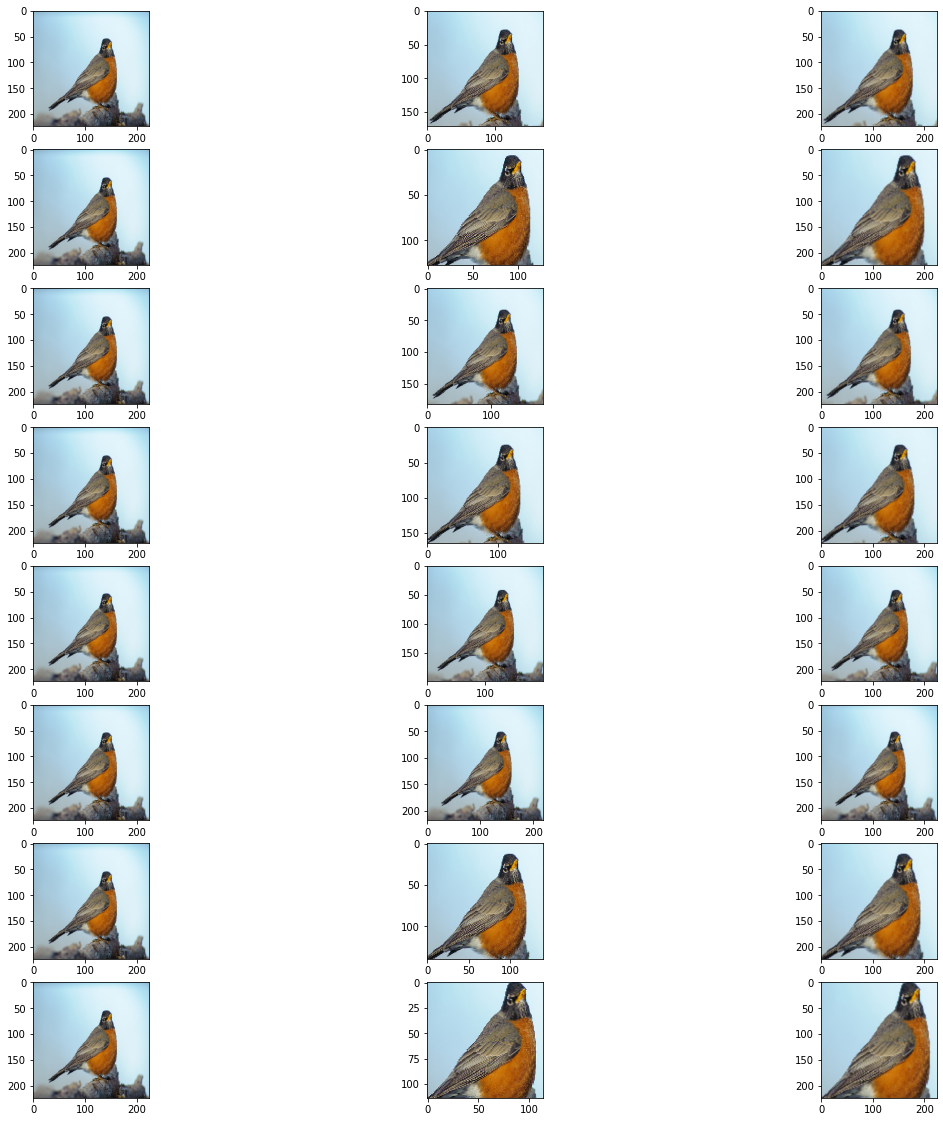

In [0]:
import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array, array_to_img
from matplotlib import pyplot as plt

# Set the sub plot parameters
f, axarr = plt.subplots(8,3,figsize=(20, 20))

for i in range(0,8):

    # load the image with the required shape
    orig_img = load_img('/content/bird.jpg', target_size=(224, 224))

    # 1st column Shows the Original image. 
    # Infact all the images in first column are same.
    axarr[i,0].imshow(orig_img)
    
    # convert the image to an array
    img = img_to_array(orig_img)
    
    # Central crop image
    image = tf.image.central_crop(img, np.random.uniform(0.50, 1.00))
      
    # convert the image to an array  
    crop_img = array_to_img(image)
    # 2nd column Shows the the Central Crop image 
    axarr[i,1].imshow(crop_img)

    # Resize to original size of image
    image = tf.image.resize(image, (224, 224))
    
    # convert the image to an array
    resize_img = array_to_img(image)
    # 3rd column Shows the the Resize Crop image
    axarr[i,2].imshow(resize_img)

## To create the user issue

https://stackoverflow.com/questions/56122670/how-to-get-string-value-out-of-tf-tensor-which-dtype-is-string

<RepeatDataset shapes: (32, 32, 3), types: tf.float32>


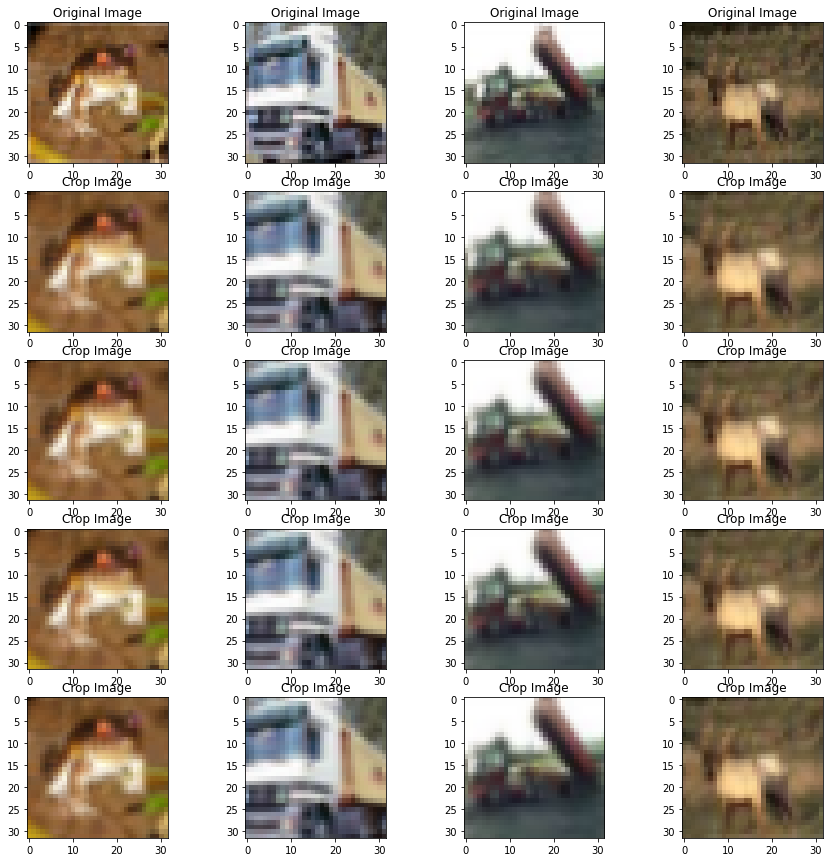

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array, array_to_img
from matplotlib import pyplot as plt
import numpy as np
AUTOTUNE = tf.data.experimental.AUTOTUNE

# Set the sub plot parameters
f, axarr = plt.subplots(5,4,figsize=(15, 15))

# Load just 4 images of Cifar10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
images = x_train[:4]

for i in range(4):
  axarr[0,i].title.set_text('Original Image')
  axarr[0,i].imshow(x_train[i])

def data_augment(images):
    image = tf.image.central_crop(images, np.random.uniform(0.50, 1.00)) # random crop central
    image = tf.image.resize(image, (32,32)) # the original image size
    return image

dataset = tf.data.Dataset.from_tensor_slices((images)).map(lambda x: data_augment(x)).repeat(4) 

print(dataset)

ix = 0
i = 1
count = 0

for f in dataset:
  crop_img = array_to_img(f)
  axarr[i,ix].title.set_text('Crop Image')
  axarr[i,ix].imshow(crop_img)
  ix=ix+1
  count = count + 1
  if count == 4:
    i = i + 1
    count = 0
    ix = 0

## Fix the user issue using tf.random.uniform and tf.py_function

Using TensorFlow backend.


170500096/170498071 [==============================] - 6s 0us/step


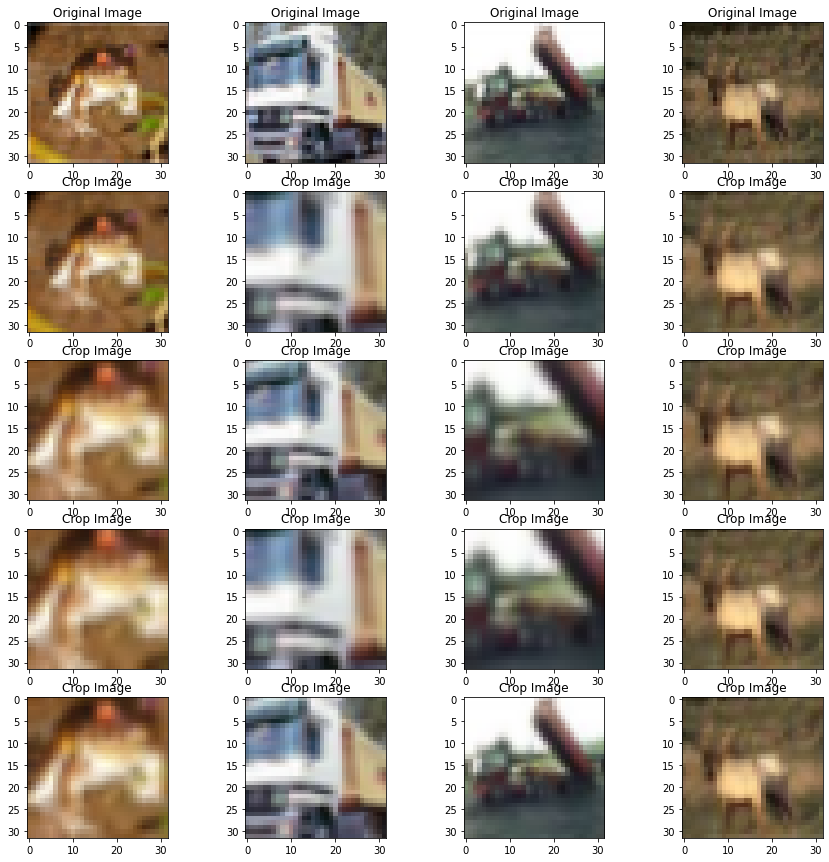

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array, array_to_img
from matplotlib import pyplot as plt
import numpy as np
AUTOTUNE = tf.data.experimental.AUTOTUNE

# Set the sub plot parameters
f, axarr = plt.subplots(5,4,figsize=(15, 15))

# Load just 4 images of Cifar10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
images = x_train[:4]

for i in range(4):
  axarr[0,i].title.set_text('Original Image')
  axarr[0,i].imshow(x_train[i])

def data_augment(images):
    image = tf.image.central_crop(images, tf.random.uniform(shape=(), minval=0.50, maxval=1).numpy()) # random crop central
    image = tf.image.resize(image, (32,32)) # the original image size
    return image

dataset = tf.data.Dataset.from_tensor_slices((images)).map(lambda x: tf.py_function(data_augment, [x], [tf.float32])).repeat(4)

ix = 0
i = 1
count = 0

for f in dataset:
  for l in f:
    crop_img = array_to_img(l)
    axarr[i,ix].title.set_text('Crop Image')
    axarr[i,ix].imshow(crop_img)
    ix=ix+1
    count = count + 1
    if count == 4:
      i = i + 1
      count = 0
      ix = 0

## Fix the user issue using np.random.uniform and tf.py_function

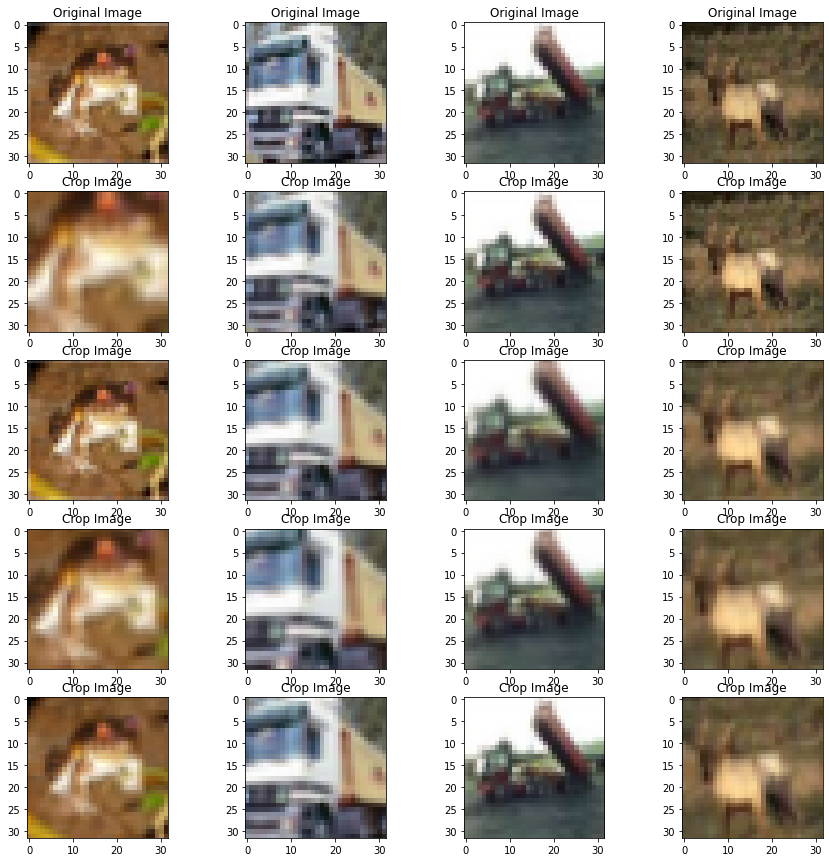

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array, array_to_img
from matplotlib import pyplot as plt
import numpy as np
AUTOTUNE = tf.data.experimental.AUTOTUNE

# Set the sub plot parameters
f, axarr = plt.subplots(5,4,figsize=(15, 15))

# Load just 4 images of Cifar10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
images = x_train[:4]

for i in range(4):
  axarr[0,i].title.set_text('Original Image')
  axarr[0,i].imshow(x_train[i])

def data_augment(images):
    image = tf.image.central_crop(images, np.random.uniform(0.50, 1.00)) # random crop central
    image = tf.image.resize(image, (32,32)) # the original image size
    return image

dataset = tf.data.Dataset.from_tensor_slices((images)).map(lambda x: tf.py_function(data_augment, [x], [tf.float32])).repeat(4)

ix = 0
i = 1
count = 0

for f in dataset:
  for l in f:
    crop_img = array_to_img(l)
    axarr[i,ix].title.set_text('Crop Image')
    axarr[i,ix].imshow(crop_img)
    ix=ix+1
    count = count + 1
    if count == 4:
      i = i + 1
      count = 0
      ix = 0
  

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np

dataset = tf.data.Dataset.range(1, 6, output_type=tf.float32)  # ==> [ 1, 2, 3, 4, 5 ] 
dataset = dataset.map(lambda x: x + tf.random.uniform(shape=(), minval=0.50, maxval=1)).repeat(2)
list(dataset.as_numpy_iterator()) 

[1.7136955,
 2.9636447,
 3.8859699,
 4.6167207,
 5.759637,
 1.5128359,
 2.682452,
 3.6926408,
 4.8078475,
 5.7302203]

In [0]:
x = tf.random.uniform(shape=(), minval=0.50, maxval=1).numpy()
print(x)

0.65555334


# 07/05/2020 - model.save error
https://stackoverflow.com/q/61031465

In [0]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(784,3), name='digits')
x = layers.GRU(64, activation='relu', name='GRU',dropout=0.1)(inputs)
x = layers.Dense(64, activation='relu', name='dense')(x)
outputs = layers.Dense(10, activation='softmax', name='predictions')(x)

model = keras.Model(inputs=inputs, outputs=outputs, name='3_layer')

model.save('model',save_format='tf')

1.15.2


ValueError: ignored

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(784,3), name='digits')
x = layers.GRU(64, activation='relu', name='GRU',dropout=0.1)(inputs)
x = layers.Dense(64, activation='relu', name='dense')(x)
outputs = layers.Dense(10, activation='softmax', name='predictions')(x)

model = keras.Model(inputs=inputs, outputs=outputs, name='3_layer')

model.save('model',save_format='tf')

print("model saved")

2.2.0-rc4
INFO:tensorflow:Assets written to: model/assets
model saved


# 07/05/2020 - Custom Loss
https://stackoverflow.com/questions/61024276/how-to-implement-a-custom-cost-function-in-keras/61660592#61660592

In [0]:
import numpy as np
a = np.array([[1,2],[3,4]])
b = np.array([[5,6],[7,8]])
np.subtract(a,b)

array([[-4, -4],
       [-4, -4]])

In [0]:
import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array, array_to_img
from matplotlib import pyplot

# Load the image
y_true = load_img('/content/bird.jpg', target_size=(224, 224))

# Convert Image to array
image = img_to_array(y_true)

# Central crop image
image = tf.image.central_crop(image, np.random.uniform(0.50, 1.00))

# Resize to original size of image
image = tf.image.resize(image, (224, 224))

# convert the image to an array
y_pred = array_to_img(image)

# def custom_loss():
#     def loss(y_true, y_pred):
#         y_true = img_to_array(y_true)
#         y_pred = img_to_array(y_pred)
#         L1 = np.square(np.subtract(y_true,y_pred)).mean()
#         L2 = np.sum(np.concatenate(np.square(np.multiply(y_true,y_pred))))
#         loss=L1-L2
#         return loss

def loss(y_true, y_pred):
    y_true = img_to_array(y_true)
    y_pred = img_to_array(y_pred)
    L1 = np.square(np.subtract(y_true,y_pred)).mean()
    L2 = np.sum(np.concatenate(np.square(np.multiply(y_true,y_pred))))
    loss=L1-L2
    return loss

x = loss(y_true,y_pred)
print(x)

-251577020000000.0


# 08/05/2020 - Layer concatenation
https://stackoverflow.com/questions/61416529/how-to-concatenate-different-layer-outputs-to-feed-as-input-to-a-new-layer-in-te

# 08/05/2020 - tf.data.Dataset.list_files
https://stackoverflow.com/questions/60997186/understanding-how-to-use-tf-dataset-map

Helpful link to convert string tensor to string - https://stackoverflow.com/questions/56122670/how-to-get-string-value-out-of-tf-tensor-which-dtype-is-string

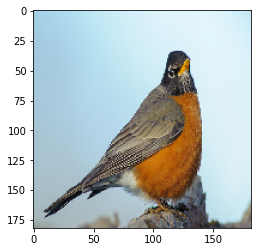

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array, array_to_img
from matplotlib import pyplot as plt
import numpy as np

def load_file_and_process(path):
    image = load_img(bytes.decode(path.numpy()), target_size=(224, 224))
    image = img_to_array(image)
    image = tf.image.central_crop(image, np.random.uniform(0.50, 1.00))
    return image

train_dataset = tf.data.Dataset.list_files('/content/bird.jpg')
train_dataset = train_dataset.map(lambda x: tf.py_function(load_file_and_process, [x], [tf.float32]))

for f in train_dataset:
  for l in f:
    image = np.array(array_to_img(l))
    plt.imshow(image)

# 08/05/2020 - String from tf.tensor

https://stackoverflow.com/questions/60497480/using-a-dataset-of-filenames-create-a-dataset-of-images-to-tuples

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np

def get_path(file_path):
    print("file_path: ",bytes.decode(file_path.numpy()),type(bytes.decode(file_path.numpy())))
    return file_path

train_dataset = tf.data.Dataset.list_files('/content/bird.jpg')
train_dataset = train_dataset.map(lambda x: tf.py_function(get_path, [x], [tf.string]))

for one_element in train_dataset:
    print(one_element)

file_path:  /content/bird.jpg <class 'str'>
(<tf.Tensor: shape=(), dtype=string, numpy=b'/content/bird.jpg'>,)


# 08/05/2020 - Dynamic Loss Function
https://stackoverflow.com/questions/60396178/is-there-a-way-to-do-dynamically-weighted-addition-of-loss-functions-in-tensorfl

In [0]:
# Importing dependency
%tensorflow_version 2.x
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import numpy as np
import tensorflow as tf

tf.keras.backend.clear_session()  # For easy reset of notebook state.
tf.compat.v1.disable_eager_execution()

# Import Data
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Build Model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10))

# Model Compile 
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Define the Required Callback Function
class GradientCalcCallback(tf.keras.callbacks.Callback):
  def on_epoch_begin(self, epoch, logs=None):
    if (epoch < 3):
      model.add_loss(0.25)
    else:
      model.add_loss(0.5)
    print("\n",logs.get('loss'))

model.fit(train_images, train_labels, epochs=4, validation_data=(test_images, test_labels), callbacks=[GradientCalcCallback()])


Train on 50000 samples, validate on 10000 samples


AttributeError: ignored

#  Unable to create error 

https://stackoverflow.com/questions/60490084/tensorflow-keras-error-when-calculating-intermediate-layer-output

In [0]:
!pip install tensorflow==1.13.1

     |████████████████████████████████| 92.5MB 41kB/s 
     |████████████████████████████████| 368kB 45.3MB/s 
     |████████████████████████████████| 3.2MB 35.9MB/s 
  Found existing installation: tensorflow-estimator 1.15.1
    Uninstalling tensorflow-estimator-1.15.1:
      Successfully uninstalled tensorflow-estimator-1.15.1
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.2
    Uninstalling tensorflow-1.15.2:
      Successfully uninstalled tensorflow-1.15.2


In [0]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)
# MLP for Pima Indians Dataset saved to single file
import numpy as np
from numpy import loadtxt
import tensorflow as tf
from tensorflow.python.keras.models import Sequential  
from tensorflow.python.keras.layers import Dense

# load pima indians dataset
dataset = np.loadtxt("/content/pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# define model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model Summary
model.summary()

# Fit the model
model.fit(X, Y, epochs=150, batch_size=10, verbose=0)

# evaluate the model
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# save model and architecture to single file
model.save("model.h5")
print("Saved model to disk")

1.13.1
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
acc: 78.12%
Saved model to disk


In [0]:
# load and evaluate a saved model
import tensorflow as tf
from numpy import loadtxt
from tensorflow.python.keras.models import load_model
 
# load model
model = load_model('model.h5')

model = tf.keras.Model(inputs=model.input,
                                    outputs=model.layers[1].output)

# summarize model
model.summary()

# LOAD THE NEW DATASET HERE
dataset = loadtxt("pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# evaluate the model
score = model.predict(X)
#print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_input (InputLayer)     (None, 8)                 0         
_________________________________________________________________
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
Total params: 212
Trainable params: 212
Non-trainable params: 0
_________________________________________________________________


# 11/05/2020 - Shape error in model.predict
https://stackoverflow.com/questions/61674047/how-to-fix-model-expected-expected-to-see-2-arrays-but-instead-got-an

In [0]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)
# MLP for Pima Indians Dataset saved to single file
import numpy as np
from numpy import loadtxt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Concatenate

# load pima indians dataset
dataset = np.loadtxt("/content/pima-indians-diabetes.csv", delimiter=",")

# dataset = np.array(dataset)

input1 = Input(shape=(1,))
input2 = Input(shape=(1,))

# define model
x1 = Dense(12, input_shape = (2,), activation='relu')(input1)
x2 = Dense(12, input_shape = (2,), activation='relu')(input2)
x = Concatenate()([x1, x2])
x = Dense(8, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(inputs=[input1, input2], outputs=x)

# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model Summary
model.summary()

X1 = np.array(dataset[:,0])
X2 = np.array(dataset[:,1])

Y = np.array(dataset[:,8])

# Fit the model
model.fit(x=[X1,X2], y=Y, epochs=150, batch_size=10, verbose=0)

# evaluate the model
scores = model.predict([X1,X2], verbose=0)

TensorFlow is already loaded. Please restart the runtime to change versions.
2.2.0-rc4


ValueError: ignored

In [0]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)
# MLP for Pima Indians Dataset saved to single file
import numpy as np
from numpy import loadtxt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, Concatenate

# load pima indians dataset
dataset = np.loadtxt("/content/pima-indians-diabetes.csv", delimiter=",")

input1 = Input(shape=(1,))
input2 = Input(shape=(1,))

# define model
x1 = Dense(12, input_shape = (2,), activation='relu')(input1)
x2 = Dense(12, input_shape = (2,), activation='relu')(input2)
x = Concatenate()([x1, x2])
x = Dense(8, activation='relu')(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(inputs=[input1, input2], outputs=x)

# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model Summary
model.summary()

X1 = dataset[:,0]
X2 = dataset[:,1]

Y = dataset[:,8]

# Fit the model
model.fit(x=[X1,X2], y=Y, epochs=150, batch_size=10, verbose=0)

# evaluate the model
scores = model.predict([X1,X2], verbose=0)

1.15.2
Model: "model_24"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_40 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_41 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
dense_96 (Dense)                (None, 12)           24          input_40[0][0]                   
__________________________________________________________________________________________________
dense_97 (Dense)                (None, 12)           24          input_41[0][0]                   
____________________________________________________________________________________

# 11/05/2020 - tf.newaxis
https://stackoverflow.com/q/60365076

## User Code

In [0]:
import tensorflow as tf

def broadcast_cash_flows(x):
    shape = tf.shape(x)
    dimensions = len(shape)
    return tf.cond(dimensions == 0,
                   lambda: cf_0d(x),
                   lambda: tf.cond(dimensions == 1,
                                   lambda: cf_1d(x),
                                   lambda: tf.cond(dimensions == 2,
                                                   lambda: cf_2d(x),
                                                   lambda: x)))

def cf_0d(x):
    return tf.expand_dims(tf.expand_dims(tf.expand_dims(x,0),0),0)

def cf_1d(x):
    return tf.expand_dims(tf.expand_dims(x,0),0)

def cf_2d(x):
    return tf.expand_dims(x,0)


cf0 = tf.constant(2.0)
print(broadcast_cash_flows(cf0))

cf1 = tf.constant([2.0, 1.0, 3.0])
print(broadcast_cash_flows(cf1))

cf2 = tf.constant([[2.0, 1.0, 3.0],
                   [3.0, 2.0, 4.0]])
print(broadcast_cash_flows(cf2))

cf3 = tf.constant([[[2.0, 1.0, 3.0],
                    [3.0, 2.0, 4.0]],
                    [[2.0, 1.0, 3.0],
                    [3.0, 2.0, 4.0]]])
print(broadcast_cash_flows(cf3))

tf.Tensor([[[2.]]], shape=(1, 1, 1), dtype=float32)
tf.Tensor([[[2. 1. 3.]]], shape=(1, 1, 3), dtype=float32)
tf.Tensor(
[[[2. 1. 3.]
  [3. 2. 4.]]], shape=(1, 2, 3), dtype=float32)
tf.Tensor(
[[[2. 1. 3.]
  [3. 2. 4.]]

 [[2. 1. 3.]
  [3. 2. 4.]]], shape=(2, 2, 3), dtype=float32)


## Modified Code

In [0]:
import tensorflow as tf

def broadcast_cash_flows(x):
    shape = tf.shape(x)
    dimensions = len(shape)
    if(dimensions == 0):
      return x[tf.newaxis,tf.newaxis,tf.newaxis]
    elif(dimensions == 1):
      return x[tf.newaxis,tf.newaxis,:]
    elif(dimensions == 2):
      return x[tf.newaxis,:,:]
    else:
      return x

cf0 = tf.constant(2.0)
print(broadcast_cash_flows(cf0))

cf1 = tf.constant([2.0, 1.0, 3.0])
print(broadcast_cash_flows(cf1))

cf2 = tf.constant([[2.0, 1.0, 3.0],
                   [3.0, 2.0, 4.0]])
print(broadcast_cash_flows(cf2))

cf3 = tf.constant([[[2.0, 1.0, 3.0],
                    [3.0, 2.0, 4.0]],
                    [[2.0, 1.0, 3.0],
                    [3.0, 2.0, 4.0]]])
print(cf3.shape)
print(broadcast_cash_flows(cf3))

tf.Tensor([[[2.]]], shape=(1, 1, 1), dtype=float32)
tf.Tensor([[[2. 1. 3.]]], shape=(1, 1, 3), dtype=float32)
tf.Tensor(
[[[2. 1. 3.]
  [3. 2. 4.]]], shape=(1, 2, 3), dtype=float32)
(2, 2, 3)
tf.Tensor(
[[[2. 1. 3.]
  [3. 2. 4.]]

 [[2. 1. 3.]
  [3. 2. 4.]]], shape=(2, 2, 3), dtype=float32)


In [0]:
import tensorflow as tf
cf1 = tf.constant([2.0, 1.0, 3.0])
print(cf1)
cf1 = cf1[tf.newaxis, tf.newaxis, :]
print(cf1)

tf.Tensor([2. 1. 3.], shape=(3,), dtype=float32)
tf.Tensor([[[2. 1. 3.]]], shape=(1, 1, 3), dtype=float32)


# 11/05/2020 - Calculating time taken by functions

In [0]:
import time
start = time.perf_counter()

def myfunc():
  a = 0
  for i in range(10000):
    a = a + 1
  return a

b = myfunc()

elapsed = time.perf_counter() - start

print('Elapsed time for myfunc() is %.3f seconds.' % elapsed)
# The .3f is to round to 3 decimal places.

Elapsed time for myfunc() is 0.001 seconds.


# 11/05/2020 - session.run() error
https://stackoverflow.com/questions/60273799/left-shift-values-in-a-tensorarray-in-tensorflow-v1-15/61734058#61734058

## User Code

In [0]:
import tensorflow as tf

an_array = tf.TensorArray(dtype=tf.float32, size=2, dynamic_size=False, clear_after_read=False, element_shape=(1, 2), name="First")
old_array = tf.TensorArray(dtype=tf.float32, size=2, dynamic_size=False, clear_after_read=False, element_shape=(1, 2), name="Second")
old_array = old_array.write(0, 2.*tf.ones((1, 2)))
old_array = old_array.write(1, 3.*tf.ones((1, 2)))
for _ in range(1, 5):
    val = tf.random.normal(shape=(1, 2))
    an_array = an_array.write(0, old_array.read(1))
    an_array = an_array.write(1, val)
    old_array = an_array.identity()
    
print(tf.Session().run([an_array.stack(), old_array.stack()]))

## Fixed Code

In [0]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

an_array = tf.TensorArray(dtype=tf.float32, size=2, dynamic_size=False, clear_after_read=False, element_shape=(1, 2), name="First")
old_array = tf.TensorArray(dtype=tf.float32, size=2, dynamic_size=False, clear_after_read=False, element_shape=(1, 2), name="Second")
old_array = old_array.write(0, 2.*tf.ones((1, 2)))
old_array = old_array.write(1, 3.*tf.ones((1, 2)))
for _ in range(1, 5):
    val = tf.random.normal(shape=(1, 2))
    an_array = an_array.write(0, old_array.read(1))
    an_array = an_array.write(1, val)
    old_array = an_array.identity()

with tf.Session().as_default() as sess:
  print([an_array.stack(), old_array.stack()])

1.15.2


InvalidArgumentError: ignored

# 12/05/2020 - Multiple Input/Output with Multiple Loss Function
https://stackoverflow.com/questions/60241394/how-the-softmax-function-and-loss-function-work-in-multiple-input-keras-model/61751286#61751286

In [0]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

image_input = keras.Input(shape=(32, 32, 3), name='img_input')
timeseries_input = keras.Input(shape=(None, 10), name='ts_input')

x1 = layers.Conv2D(3, 3)(image_input)
x1 = layers.GlobalMaxPooling2D()(x1)

x2 = layers.Conv1D(3, 3)(timeseries_input)
x2 = layers.GlobalMaxPooling1D()(x2)

x = layers.concatenate([x1, x2])

score_output = layers.Dense(1, name='score_output')(x)
class_output = layers.Dense(5, name='class_output')(x)

model = keras.Model(inputs=[image_input, timeseries_input],
                    outputs=[score_output, class_output])

keras.utils.plot_model(model, 'multi_input_and_output_model.png', show_shapes=True)

model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=[keras.losses.MeanSquaredError(),
          keras.losses.CategoricalCrossentropy(from_logits=True)])

# Generate dummy Numpy data
img_data = np.random.random_sample(size=(100, 32, 32, 3))
ts_data = np.random.random_sample(size=(100, 20, 10))
score_targets = np.random.random_sample(size=(100, 1))
class_targets = np.random.random_sample(size=(100, 5))

# Fit on lists
model.fit([img_data, ts_data], [score_targets, class_targets],
          batch_size=32,
          epochs=3)

# Alternatively, fit on dicts
model.fit({'img_input': img_data, 'ts_input': ts_data},
          {'score_output': score_targets, 'class_output': class_targets},
          batch_size=32,
          epochs=3)

Epoch 1/3
4/4 [==============================] - 0s 5ms/step - loss: 4.8747 - score_output_loss: 0.2785 - class_output_loss: 4.5962
Epoch 2/3
4/4 [==============================] - 0s 5ms/step - loss: 4.6675 - score_output_loss: 0.1272 - class_output_loss: 4.5403
Epoch 3/3
4/4 [==============================] - 0s 5ms/step - loss: 4.5757 - score_output_loss: 0.1183 - class_output_loss: 4.4574
Epoch 1/3
4/4 [==============================] - 0s 5ms/step - loss: 4.5376 - score_output_loss: 0.1226 - class_output_loss: 4.4150
Epoch 2/3
4/4 [==============================] - 0s 5ms/step - loss: 4.4896 - score_output_loss: 0.1178 - class_output_loss: 4.3718
Epoch 3/3
4/4 [==============================] - 0s 5ms/step - loss: 4.4484 - score_output_loss: 0.1205 - class_output_loss: 4.3279


# 12/05/2020 - keras_efficientnets

Build keras_efficientnets, evaluate the model, save the model (**model.save & model.save_weights**) and load the model (**model.load_model & model.load_weights**).

https://stackoverflow.com/questions/61493605/keras-model-containing-efficientnet-submodel-cant-load-weights-any-keras-appli

In [0]:
!pip install keras_efficientnets

## Build keras_efficientnets, evaluate the model, save & load the model (**model.save & model.load_model**)

In [0]:
%tensorflow_version 1.x
import keras
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, Dense, Flatten
from keras_efficientnets import EfficientNetB0

model = EfficientNetB0(input_shape=(224, 224, 3), classes=1000, include_top=False, weights='imagenet')

x = model.output
x = GlobalAveragePooling2D()(x)
x = Dense(20, activation='relu')(x)
x = Dense(17, activation='softmax')(x)
model = Model(inputs = model.input, outputs = x)

# summarize model
#model.summary()

# (2) Get Data
import tflearn.datasets.oxflower17 as oxflower17
x, y = oxflower17.load_data(one_hot=True)

# (4) Compile 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x, y, batch_size=64, epochs= 1, verbose=1, validation_split=0.2, shuffle=True)

# evaluate the model
scores = model.evaluate(x, y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# save model and architecture to single file
model.save("model.h5py")
print("Saved model to disk")

AttributeError: ignored

In [0]:
%tensorflow_version 1.x
# load and evaluate a saved model
from numpy import loadtxt
from tensorflow.keras.models import load_model
 
# load model
model = load_model('model.h5py')

# summarize model
#model.summary()

# (2) Get Data
import tflearn.datasets.oxflower17 as oxflower17
x, y = oxflower17.load_data(one_hot=True)

# evaluate the model
score = model.evaluate(x, y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

accuracy: 54.85%


## Save & Load the model (**model.save_weights & model.load_weights**) 

In [0]:
from keras.models import model_from_json

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")
 
# later...
 
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(x, y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Saved model to disk
Loaded model from disk
accuracy: 54.85%


In [0]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

a = tf.TensorArray(dtype=tf.int32, size=1, dynamic_size=True, clear_after_read=True)
i = tf.constant(0)


#@tf.function
def body(j, a):
    tf.print("Body ", j)
    a = a.write(j, 5)
    return [tf.add(j, 1), a]


#@tf.function
def condition(j, _):
    tf.print("Condition ", j)
    return tf.less(j, 5)

#@tf.function
_, a = tf.compat.v1.while_loop(condition, body, [i, a])
c = a.stack()
print(tf.Session().run(a))

1.15.2


TypeError: ignored

# 13/05/2020 - Increment Learning Rate after every epoch using callbacks
https://stackoverflow.com/questions/59680252/add-learning-rate-to-history-object-of-fit-generator-with-tensorflow

In [0]:
%tensorflow_version 1.x
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

import os
import numpy as np
import matplotlib.pyplot as plt

_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

batch_size = 128
epochs = 4
IMG_HEIGHT = 150
IMG_WIDTH = 150

train_image_generator = ImageDataGenerator(rescale=1./255,brightness_range=[0.5,1.5]) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255,brightness_range=[0.5,1.5]) # Generator for our validation data

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

lr = 0.01
adam = Adam(lr)

# Define the Required Callback Function
class printlearningrate(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs={}):
        optimizer = self.model.optimizer
        lr = K.eval(optimizer.lr)
        Epoch_count = epoch + 1
        print('\n', "Epoch:", Epoch_count, ', LR: {:.2f}'.format(lr))

printlr = printlearningrate() 

def scheduler(epoch):
  optimizer = model.optimizer
  return K.eval(optimizer.lr + 0.01)

updatelr = tf.keras.callbacks.LearningRateScheduler(scheduler)

model.compile(optimizer=adam, 
          loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
          metrics=['accuracy'])

history = model.fit_generator(
          train_data_gen,
          steps_per_epoch=total_train // batch_size,
          epochs=epochs,
          validation_data=val_data_gen,
          validation_steps=total_val // batch_size,
          callbacks = [printlr,updatelr],
          verbose = 3)
    

68608000/68606236 [==============================] - 1s 0us/step
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Instructions for updating:
Please use Model.fit, which supports generators.

 Epoch: 1 , LR: 0.01
Epoch 1/4
15/15 [==============================] - 29s 2s/step - loss: 7.2088 - binary_crossentropy: 7.2088 - val_loss: 7.5565 - val_binary_crossentropy: 7.5565 - lr: 0.0200

 Epoch: 2 , LR: 0.02
Epoch 2/4
15/15 [==============================] - 28s 2s/step - loss: 7.6083 - binary_crossentropy: 7.6083 - val_loss: 7.5395 - val_binary_crossentropy: 7.5395 - lr: 0.0300

 Epoch: 3 , LR: 0.03
Epoch 3/4
15/15 [==============================] - 27s 2s/step - loss: 7.6083 - binary_crossentropy: 7.6083 - val_loss: 7.6246 - val_binary_crossentropy: 7.6246 - lr: 0.0400

 Epoch: 4 , LR: 0.04
Epoch 4/4
15/15 [==============================] - 27s 2s/step - loss: 7.5269 - binary_crossentropy: 7.5269 - val_loss: 7.6587 - val_binary_crossentropy: 7.6587 - lr

# 13/05/2020 - list of string to model.fit() error
https://stackoverflow.com/questions/59695014/tensorflow-keras-dataset-load-huge-multiple-numpy-files/61782313#61782313

In [0]:
!pip install tensorflow==1.9

     |████████████████████████████████| 51.1MB 81kB/s 
     |████████████████████████████████| 573kB 63.1MB/s 
     |████████████████████████████████| 3.3MB 49.0MB/s 
ERROR: magenta 0.3.19 has requirement tensorflow>=1.12.0, but you'll have tensorflow 1.9.0 which is incompatible.
ERROR: xarray 0.15.1 has requirement setuptools>=41.2, but you'll have setuptools 39.1.0 which is incompatible.
ERROR: google-auth 1.7.2 has requirement setuptools>=40.3.0, but you'll have setuptools 39.1.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: setuptools 46.1.3
    Uninstalling setuptools-46.1.3:
      Successfully uninstalled setuptools-46.1.3
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.2
    Uninstalling tensorflow-1.15.2:
      Successfully unins

In [0]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)
import numpy as np
from numpy import loadtxt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

x = ['x','x','x','x','x','x','x','x','x','y','y']
y = [1,1,1,1,1,1,1,1,1,0,0]

# define model
model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model Summary
model.summary()

# Fit the model
model.fit(x, y, epochs=150, batch_size=10, verbose=0)

1.9.0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 12)                24        
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 137
Trainable params: 137
Non-trainable params: 0
_________________________________________________________________


ValueError: ignored

# 13/05/2020 - callbacks simple example
https://stackoverflow.com/questions/59752393/why-does-keras-fit-generator-sometimes-not-call-on-epoch-end-on-validation-da/61783583#61783583

In [0]:
!pip install tensorflow==1.9

     |████████████████████████████████| 51.1MB 78kB/s 
     |████████████████████████████████| 573kB 51.3MB/s 
     |████████████████████████████████| 3.3MB 44.1MB/s 
ERROR: magenta 0.3.19 has requirement tensorflow>=1.12.0, but you'll have tensorflow 1.9.0 which is incompatible.
ERROR: xarray 0.15.1 has requirement setuptools>=41.2, but you'll have setuptools 39.1.0 which is incompatible.
ERROR: google-auth 1.7.2 has requirement setuptools>=40.3.0, but you'll have setuptools 39.1.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: setuptools 46.3.0
    Uninstalling setuptools-46.3.0:
      Successfully uninstalled setuptools-46.3.0
  Found existing installation: tensorboard 1.15.0
    Uninstalling tensorboard-1.15.0:
      Successfully uninstalled tensorboard-1.15.0
  Found existing installation: tensorflow 1.15.2
    Uninstalling tensorflow-1.15.2:
      Successfully unins

In [0]:
    import tensorflow as tf
    print(tf.__version__)
    import numpy as np
    import tensorflow
    print(tensorflow.keras.__version__)
    from tensorflow.keras import layers, models
    from tensorflow.keras.utils import Sequence

    FEATURE_SIZE = 512 ** 2

    class DataGenerator(Sequence):

        def __init__(self, batch_size, log=False):
            self.batch_size = batch_size
            self.log = log

        def __len__(self):
            print("in __len__")
            return 1

        def __getitem__(self, i):
            return np.ones((self.batch_size, FEATURE_SIZE)), np.ones((self.batch_size, 1))  # Some dummy data

        def on_epoch_end(self):
            if self.log:
                print('on_epoch_end() called')


    def train(batch_size):
        print('Training with batch_size =', batch_size)
        training_generator = DataGenerator(batch_size)
        test_generator = DataGenerator(batch_size, log=True)

        model = models.Sequential()
        model.add(layers.Dense(4, activation='sigmoid', input_shape=[FEATURE_SIZE]))
        model.add(layers.Dense(1, activation='sigmoid', input_shape=[FEATURE_SIZE]))
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

        model.fit_generator(generator=training_generator, validation_data=test_generator, epochs=5, verbose=0)


    train(batch_size=1)
    train(batch_size=64)

1.9.0
2.1.6-tf
Training with batch_size = 1


TypeError: ignored

In [0]:
    %tensorflow_version 2.x
    import numpy as np
    import tensorflow as tf
    print(tf.keras.__version__)
    from tensorflow.keras import layers, models
    from tensorflow.keras.utils import Sequence

    FEATURE_SIZE = 512 ** 2

    # Define the Required Callback Function
    class printepoch(tf.keras.callbacks.Callback):
        def on_epoch_end(self, epoch, logs={}):
          print("on_epoch_end() called")
     
    printepochs = printepoch() 

    class DataGenerator(Sequence):

        def __init__(self, batch_size, log=False):
            self.batch_size = batch_size
            self.log = log

        def __len__(self):
            print("in __len__")
            return 1

        def __getitem__(self, i):
            return np.ones((self.batch_size, FEATURE_SIZE)), np.ones((self.batch_size, 1))  # Some dummy data

        def on_epoch_end(self):
            if self.log:
                print('on_epoch_end() called')


    def train(batch_size):
        print('Training with batch_size =', batch_size)
        training_generator = DataGenerator(batch_size)
        test_generator = DataGenerator(batch_size)

        model = models.Sequential()
        model.add(layers.Dense(4, activation='sigmoid', input_shape=[FEATURE_SIZE]))
        model.add(layers.Dense(1, activation='sigmoid', input_shape=[FEATURE_SIZE]))
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

        model.fit(training_generator, validation_data=test_generator, epochs=5, verbose=0 , callbacks=[printepochs])


    train(batch_size=1)
    train(batch_size=64)

2.3.0-tf
Training with batch_size = 1
in __len__
in __len__
in __len__
in __len__
in __len__
on_epoch_end() called
in __len__
in __len__
in __len__
in __len__
on_epoch_end() called
in __len__
in __len__
in __len__
in __len__
on_epoch_end() called
in __len__
in __len__
in __len__
in __len__
on_epoch_end() called
in __len__
in __len__
in __len__
in __len__
on_epoch_end() called
Training with batch_size = 64
in __len__
in __len__
in __len__
in __len__
in __len__
on_epoch_end() called
in __len__
in __len__
in __len__
in __len__
on_epoch_end() called
in __len__
in __len__
in __len__
in __len__
on_epoch_end() called
in __len__
in __len__
in __len__
in __len__
on_epoch_end() called
in __len__
in __len__
in __len__
in __len__
on_epoch_end() called


# 14/05/2020 - tf.function-decorated function tried to create variables on non-first call Error

https://stackoverflow.com/questions/59435252/using-tensorflow-on-colab-wihtout-having-to-restart-runtime

## Code to recreate the error

In [0]:
%tensorflow_version 2.x
import tensorflow as tf

opt1 = tf.keras.optimizers.Adam(learning_rate = 1e-2)
opt2 = tf.keras.optimizers.Adam(learning_rate = 1e-3) 

@tf.function
def train_step_with_opt(a, x, y, optimizer):
    with tf.GradientTape() as tape:
        L = tf.reduce_sum(tf.square(a*x - y))
    tr_weights = [a]
    gradients = tape.gradient(L, tr_weights)
    optimizer.apply_gradients(zip(gradients, tr_weights))
    return a

a = tf.Variable(2.)
x = tf.Variable([-1.,-1.,-1.], dtype = tf.float32)
y = tf.Variable([2.,2.,2.], dtype = tf.float32)


train_step_with_opt(a, x, y, opt1) # works
print("First Run was fine")
train_step_with_opt(a, x, y, opt2) # fails
print("Second Run was fine")

First Run was fine


ValueError: ignored

## Fixed Code

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
tf.config.experimental_run_functions_eagerly(True)

opt1 = tf.keras.optimizers.Adam(learning_rate = 1e-2)
opt2 = tf.keras.optimizers.Adam(learning_rate = 1e-3) 

@tf.function
def train_step_with_opt(a, x, y, optimizer):
    with tf.GradientTape() as tape:
        L = tf.reduce_sum(tf.square(a*x - y))
    tr_weights = [a]
    gradients = tape.gradient(L, tr_weights)
    optimizer.apply_gradients(zip(gradients, tr_weights))
    return a

a = tf.Variable(2.)
x = tf.Variable([-1.,-1.,-1.], dtype = tf.float32)
y = tf.Variable([2.,2.,2.], dtype = tf.float32)


train_step_with_opt(a, x, y, opt1) # works
print("First Run was fine")
train_step_with_opt(a, x, y, opt2) # fails
print("Second Run was fine")

First Run was fine
Second Run was fine


# 14/05/2020 - pyplot.savefig

https://stackoverflow.com/questions/59434287/how-do-i-save-my-image-which-is-decoded-from-tfrecord-after-plotting-a-box-on-it/61800975#61800975

Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_17 (InputLayer)        (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________


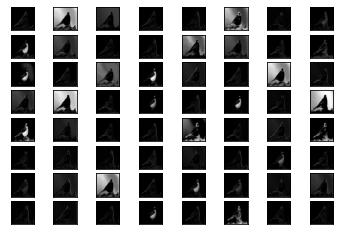

In [0]:
# plot feature map of first conv layer for given image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims

# load the model
model = VGG16()

# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
model.summary()

# load the image with the required shape
img = load_img('bird.jpg', target_size=(224, 224))

# convert the image to an array
img = img_to_array(img)

# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)

# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)

# get feature map for first hidden layer
feature_maps = model.predict(img)

# plot all 64 maps in an 8x8 squares
square = 8
ix = 1
for _ in range(square):
	for _ in range(square):
		# specify subplot and turn of axis
		ax = pyplot.subplot(square, square, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		pyplot.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
		ix += 1

# save the figure
pyplot.savefig("Bird_Layer1")

# load the saved figure
img = load_img('Bird_Layer1.png')

# print the loaded figure
pyplot.show(img)

# 14/05/2020 - tf.data.Dataset.list_files from different folders
https://stackoverflow.com/questions/59388426/classify-images-with-tab-containing-path/61803243#61803243

Loading image from path : /content/bird.jpg
Crop Image is of shape :  (154, 154, 3)
Loading image from path : /usr/bird1.jpg
Crop Image is of shape :  (206, 206, 3)
Loading image from path : /content/sample_data/dog.jpg
Crop Image is of shape :  (150, 150, 3)


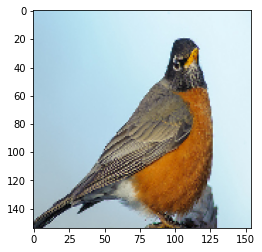

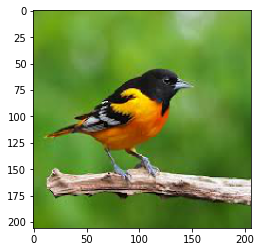

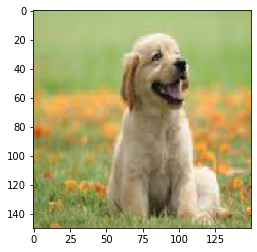

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array, array_to_img
from matplotlib import pyplot as plt
import numpy as np

file_path = ['/content/bird.jpg','/content/sample_data/dog.jpg','/usr/bird1.jpg']

def load_file_and_process(path):
    print("Loading image from path :",bytes.decode(path.numpy()))
    image = load_img(bytes.decode(path.numpy()), target_size=(224, 224))
    image = img_to_array(image)
    image = tf.image.central_crop(image, np.random.uniform(0.50, 1.00))
    return image

train_dataset = tf.data.Dataset.list_files(file_path)

train_dataset = train_dataset.map(lambda x: tf.py_function(load_file_and_process, [x], [tf.float32]))

for f in train_dataset:
  for l in f:
    image = np.array(array_to_img(l))
    print("Crop Image is of shape : ", image.shape)
    plt.figure()
    plt.imshow(image)

# 15/05/2020 - lstm for stock prediction
https://stackoverflow.com/questions/59443632/valueerror-error-when-checking-target-expected-activation-10-to-have-2-dimensi

Helping Document - https://towardsdatascience.com/predicting-stock-prices-using-a-keras-lstm-model-4225457f0233



In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import time

url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
dataset_train = pd.read_csv(url)
training_set = dataset_train.iloc[:, 1:2].values

dataset_train.head()

from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

X_train = []
y_train = []
for i in range(60, 2035):
  X_train.append(training_set_scaled[i-50:i, 0])
  y_train.append(training_set_scaled[i, 0])

X_train, Y_train = np.array(X_train), np.array(y_train)
X_train = X_train[:,:,np.newaxis]

#build model
model = Sequential()

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1,))
model.add(Activation('linear'))

model.summary()

start = time.time()
model.compile(loss='mse', optimizer='rmsprop')
print("compilation time: ", time.time() - start)

#train the model
model.fit(
    X_train,
    Y_train,
    batch_size=512,
    nb_epoch=1,
    validation_split=0.05)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_19 (LSTM)               (None, None, 50)          10400     
_________________________________________________________________
dropout_19 (Dropout)         (None, None, 50)          0         
_________________________________________________________________
lstm_20 (LSTM)               (None, 100)               60400     
_________________________________________________________________
dropout_20 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 101       
_________________________________________________________________
activation_10 (Activation)   (None, 1)                 0         
Total params: 70,901
Trainable params: 70,901
Non-trainable params: 0
_________________________________________________

# 15/05/2020 - tf.data.experimental.prefetch_to_device

https://stackoverflow.com/questions/59353119/how-to-solve-runtimeerror-in-tensorflow-2-0

## Code to recreate the error

In [0]:
!pip install tensorflow-gpu==2.0.0

     |████████████████████████████████| 380.8MB 39kB/s 
  Using cached https://files.pythonhosted.org/packages/fc/08/8b927337b7019c374719145d1dceba21a8bb909b93b1ad6f8fb7d22c1ca1/tensorflow_estimator-2.0.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/76/54/99b9d5d52d5cb732f099baaaf7740403e83fe6b0cedde940fabd2b13d75a/tensorboard-2.0.2-py3-none-any.whl
  Found existing installation: tensorflow-estimator 2.1.0
    Uninstalling tensorflow-estimator-2.1.0:
      Successfully uninstalled tensorflow-estimator-2.1.0
  Found existing installation: tensorboard 2.1.1
    Uninstalling tensorboard-2.1.1:
      Successfully uninstalled tensorboard-2.1.1
  Found existing installation: tensorflow-gpu 2.1.0
    Uninstalling tensorflow-gpu-2.1.0:
      Successfully uninstalled tensorflow-gpu-2.1.0


In [0]:
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices(device_type=None) 
physical_devices

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:XLA_CPU:0', device_type='XLA_CPU'),
 PhysicalDevice(name='/physical_device:XLA_GPU:0', device_type='XLA_GPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [0]:
import tensorflow_hub as hub
import tensorflow as tf 
print(tf.__version__)

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder-large/5")

with tf.device('GPU:0'):

    embeddings = embed(["The quick brown fox jumps over the lazy dog."])

print(embeddings)

2.0.0


RuntimeError: ignored

## Fixed in latest version of tensorflow

In [0]:
import tensorflow_hub as hub
import tensorflow as tf 
print(tf.__version__)

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder-large/5")

with tf.device('GPU:0'):

    embeddings = embed(["The quick brown fox jumps over the lazy dog."])

print("I Ran Successfully")

2.2.0
I Ran Successfully


# 18/05/2020 - run_eagerly = True in model.compile

https://stackoverflow.com/questions/61843285/forcing-eager-execution-in-tensorflow-2-1-0/61865095#61865095

In [0]:
  %tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)
import numpy as np
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K

print("tf.executing_eagerly() Results")
print("Before loading dataset :",tf.executing_eagerly())

# load pima indians dataset
dataset = np.loadtxt("/content/pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# define model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

print("After building model :",tf.executing_eagerly())

def weighted_binary_crossentropy(y_true, y_pred):
  print("In loss function :",tf.executing_eagerly())
  return K.mean(K.binary_crossentropy(y_pred, y_true))

# compile model
model.compile(loss=weighted_binary_crossentropy, run_eagerly = True, optimizer='adam', metrics=['accuracy'])

print("After compiling model :",tf.executing_eagerly())

# Fit the model
model.fit(X, Y, epochs=1, batch_size=150, verbose=0)

# evaluate the model
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


2.2.0
tf.executing_eagerly() Results
Before loading dataset : True
After building model : True
After compiling model : True
In loss function : True
In loss function : True
In loss function : True
In loss function : True
In loss function : True
In loss function : True
In loss function : True
In loss function : True
In loss function : True
In loss function : True
In loss function : True
In loss function : True
In loss function : True
In loss function : True
In loss function : True
In loss function : True
In loss function : True
In loss function : True
In loss function : True
In loss function : True
In loss function : True
In loss function : True
In loss function : True
In loss function : True
In loss function : True
In loss function : True
In loss function : True
In loss function : True
In loss function : True
In loss function : True
accuracy: 34.90%


# tf.GradientTape

In [0]:
# (1) Importing dependency
%tensorflow_version 1.x
import tensorflow as tf
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np

np.random.seed(1000)
    
# (2) Get Data
import tflearn.datasets.oxflower17 as oxflower17
x, y = oxflower17.load_data(one_hot=True)
    
# (3) Create a sequential model
model = Sequential()
    
# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11), strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# # Pooling 
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# # Batch Normalisation before passing it to the next layer
# model.add(BatchNormalization())
    
# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# # Pooling
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# # Batch Normalisation
# model.add(BatchNormalization())
    
# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())
    
# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# # Batch Normalisation
# model.add(BatchNormalization())
    
# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# # Pooling
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# # Batch Normalisation
# model.add(BatchNormalization())
    
# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# # Add Dropout to prevent overfitting
# model.add(Dropout(0.4))
# # Batch Normalisation
# model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# # Add Dropout
# model.add(Dropout(0.4))
# # Batch Normalisation
# model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# # Add Dropout
# model.add(Dropout(0.4))
# # Batch Normalisation
# model.add(BatchNormalization())

# Output Layer
model.add(Dense(17))
model.add(Activation('softmax'))

model.summary()

# (4) Compile 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epoch_gradient = []

def get_gradient_func(model):
    grads = K.gradients(model.total_loss, model.trainable_weights)
    inputs = model.model._feed_inputs + model.model._feed_targets + model.model._feed_sample_weights
    func = K.function(inputs, grads)
    return func

# Define the Required Callback Function
class GradientCalcCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
      get_gradient = get_gradient_func(model)
      grads = get_gradient([x, y, np.ones(len(y))])
      epoch_gradient.append(grads)
    
epoch = 4

model.fit(x, y, batch_size=64, epochs= epoch, verbose=1, validation_split=0.2, shuffle=True, callbacks=[GradientCalcCallback()])
    
# (7) Convert to a 2 dimensiaonal array of (epoch, gradients) type
gradient = np.asarray(epoch_gradient)
print("Total number of epochs run:", epoch)
print("Gradient Array has the shape:",gradient.shape)

TensorFlow 1.x selected.


Using TensorFlow backend.


100.0% 60276736 / 60270631


('Succesfully downloaded', '17flowers.tgz', 60270631, 'bytes.')
File Extracted
Starting to parse images...
Parsing Done!
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
activation_1 (Activation)    (None, 54, 54, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 44, 44, 256)       2973952   
_________________________________________________________________
activation_2 (Activation)    (None, 44, 44, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 42, 42, 384)       885120    
__________________________________________________

ResourceExhaustedError: ignored

In [0]:
# Importing dependency
%tensorflow_version 2.x
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import numpy as np
import tensorflow as tf

tf.keras.backend.clear_session()  # For easy reset of notebook state.
tf.compat.v1.disable_eager_execution()

# Import Data
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# (3) Create a sequential model
model = Sequential()
    
# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(32, 32, 3), kernel_size=(11,11), strides=(4,4), padding='same'))
model.add(Activation('relu'))
# # Pooling 
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
# # Batch Normalisation before passing it to the next layer
# model.add(BatchNormalization())
    
# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# # Pooling
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
# # Batch Normalisation
# model.add(BatchNormalization())
    
# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())
    
# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# # Batch Normalisation
# model.add(BatchNormalization())
    
# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='same'))
model.add(Activation('relu'))
# # Pooling
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
# # Batch Normalisation
# model.add(BatchNormalization())
    
# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# # Add Dropout to prevent overfitting
# model.add(Dropout(0.4))
# # Batch Normalisation
# model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# # Add Dropout
# model.add(Dropout(0.4))
# # Batch Normalisation
# model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# # Add Dropout
# model.add(Dropout(0.4))
# # Batch Normalisation
# model.add(BatchNormalization())

# Output Layer
model.add(Dense(10))
model.add(Activation('softmax'))

# Model Summary
model.summary()

# Model Compile 
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Define the Gradient Fucntion
epoch_gradient = []

# Define the Gradient Function
def get_gradient_func(model):
    grads = K.gradients(model.total_loss, model.trainable_weights)
    inputs = model._feed_inputs + model._feed_targets + model._feed_sample_weights
    func = K.function(inputs, grads)
    return func

# Define the Required Callback Function
class GradientCalcCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
      get_gradient = get_gradient_func(model)
      grads = get_gradient([train_images, train_labels, np.ones(len(train_labels))])
      epoch_gradient.append(grads)
    
epoch = 4

model.fit(train_images, train_labels, epochs=epoch, validation_data=(test_images, test_labels), callbacks=[GradientCalcCallback()])


# (7) Convert to a 2 dimensiaonal array of (epoch, gradients) type
gradient = np.asarray(epoch_gradient)
print("Total number of epochs run:", epoch)
print("Gradient Array has the shape:",gradient.shape)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 8, 8, 96)          34944     
_________________________________________________________________
activation (Activation)      (None, 8, 8, 96)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 256)         2973952   
_________________________________________________________________
activation_1 (Activation)    (None, 8, 8, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 384)         885120    
_________________________________________________________________
activation_2 (Activation)    (None, 8, 8, 384)         0         
_________________________________________

KeyboardInterrupt: ignored

In [0]:
%tensorflow_version 2.x
# import the necessary packages
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import numpy as np
import time
import sys

def build_model(width, height, depth, classes):
	# initialize the input shape and channels dimension to be
	# "channels last" ordering
	inputShape = (height, width, depth)
	chanDim = -1
	# build the model using Keras' Sequential API
	model = Sequential([
		# CONV => RELU => BN => POOL layer set
		Conv2D(96, (3, 3), padding="same", input_shape=inputShape),
		Activation("relu"),
		BatchNormalization(axis=chanDim),
		# MaxPooling2D(pool_size=(2, 2)),
		# (CONV => RELU => BN) * 2 => POOL layer set
		Conv2D(256, (3, 3), padding="same"),
		Activation("relu"),
		BatchNormalization(axis=chanDim),
		Conv2D(256, (3, 3), padding="same"),
		Activation("relu"),
		BatchNormalization(axis=chanDim),
		# MaxPooling2D(pool_size=(2, 2)),
		# (CONV => RELU => BN) * 3 => POOL layer set
		Conv2D(384, (3, 3), padding="same"),
		Activation("relu"),
		BatchNormalization(axis=chanDim),
		Conv2D(384, (3, 3), padding="same"),
		Activation("relu"),
		BatchNormalization(axis=chanDim),
		Conv2D(384, (3, 3), padding="same"),
		Activation("relu"),
		BatchNormalization(axis=chanDim),
		# MaxPooling2D(pool_size=(2, 2)),
		# first (and only) set of FC => RELU layers
		Flatten(),
		Dense(4096),
		Activation("relu"),
		BatchNormalization(),
		Dropout(0.5),
		Dense(1000),
		Activation("relu"),
		BatchNormalization(),
		Dropout(0.5),
		# softmax classifier
		Dense(classes),
		Activation("softmax")
	])
	# return the built model to the calling function
	return model

step_gradient = []

def step(X, y):
	# keep track of our gradients
	with tf.GradientTape() as tape:
		# make a prediction using the model and then calculate the
		# loss
		pred = model(X)
		loss = categorical_crossentropy(y, pred)
	# calculate the gradients using our tape and then update the
	# model weights
	grads = tape.gradient(loss, model.trainable_variables)
	opt.apply_gradients(zip(grads, model.trainable_variables))
	step_gradient.append(grads)

# initialize the number of epochs to train for, batch size, and
# initial learning rate
EPOCHS = 25
BS = 64
INIT_LR = 1e-3
# load the MNIST dataset
print("[INFO] loading MNIST dataset...")
((trainX, trainY), (testX, testY)) = mnist.load_data()
# add a channel dimension to every image in the dataset, then scale
# the pixel intensities to the range [0, 1]
trainX = np.expand_dims(trainX, axis=-1)
testX = np.expand_dims(testX, axis=-1)
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0
# one-hot encode the labels
trainY = to_categorical(trainY, 10)
testY = to_categorical(testY, 10)

# build our model and initialize our optimizer
print("[INFO] creating model...")
model = build_model(28, 28, 1, 10)
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)

# compute the number of batch updates per epoch
numUpdates = int(trainX.shape[0] / BS)
# loop over the number of epochs
for epoch in range(0, EPOCHS):
	# show the current epoch number
	print("[INFO] starting epoch {}/{}...".format(
		epoch + 1, EPOCHS), end="")
	sys.stdout.flush()
	epochStart = time.time()
	# loop over the data in batch size increments
	for i in range(0, numUpdates):
		# determine starting and ending slice indexes for the current
		# batch
		start = i * BS
		end = start + BS
		# take a step
		step(trainX[start:end], trainY[start:end])
	# show timing information for the epoch
	epochEnd = time.time()
	elapsed = (epochEnd - epochStart) / 60.0
	print("took {:.4} minutes".format(elapsed))
 
 # in order to calculate accuracy using Keras' functions we first need
# to compile the model
model.compile(optimizer=opt, loss=categorical_crossentropy,
	metrics=["acc"])
# now that the model is compiled we can compute the accuracy
(loss, acc) = model.evaluate(testX, testY)
print("[INFO] test accuracy: {:.4f}".format(acc))

[INFO] loading MNIST dataset...
[INFO] creating model...
[INFO] starting epoch 1/25...took 16.22 minutes
[INFO] starting epoch 2/25...

# New Section

In [0]:
import tensorflow as tf

y_true = [[0., 1.], [0., 0.]]
y_pred = [[0.6399797979455, 0.428093979], [0.483543434224, 0.678092193021]]
# Using 'auto'/'sum_over_batch_size' reduction type.
bce = tf.keras.losses.BinaryCrossentropy()
bce(y_true, y_pred).numpy()

0.9160652

In [0]:
import tensorflow as tf

y_true = [[0., 1.], [0., 0.]]
y_pred = [[0.6399797979455, 0.428093979], [0.483543434224, 0.678092193021]]
# Using 'auto'/'sum_over_batch_size' reduction type.
bce = tf.keras.metrics.BinaryCrossentropy()
bce(y_true, y_pred).numpy()

0.9160652

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K

import os
import numpy as np
import matplotlib.pyplot as plt

_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

batch_size = 128
epochs = 4
IMG_HEIGHT = 150
IMG_WIDTH = 150

train_image_generator = ImageDataGenerator(rescale=1./255,brightness_range=[0.5,1.5]) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255,brightness_range=[0.5,1.5]) # Generator for our validation data

train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

lr = 0.01
adam = Adam(lr)

# Define the Required Callback Function
class printlearningrate(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs={}):
        optimizer = self.model.optimizer
        lr = K.eval(optimizer.lr)
        Epoch_count = epoch + 1
        print('\n', "Epoch:", Epoch_count, ', LR: {:.2f}'.format(lr))

printlr = printlearningrate() 

def scheduler(epoch):
  optimizer = model.optimizer
  return K.eval(optimizer.lr + 0.01)

updatelr = tf.keras.callbacks.LearningRateScheduler(scheduler)

model.compile(optimizer=adam, 
          loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
          metrics=['accuracy'])

history = model.fit_generator(
          train_data_gen,
          steps_per_epoch=total_train // batch_size,
          epochs=epochs,
          validation_data=val_data_gen,
          validation_steps=total_val // batch_size,
          callbacks = [printlr,updatelr],
          verbose = 3)
    

68608000/68606236 [==============================] - 1s 0us/step
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Instructions for updating:
Please use Model.fit, which supports generators.

 Epoch: 1 , LR: 0.01
Epoch 1/4
15/15 [==============================] - 29s 2s/step - loss: 7.2088 - binary_crossentropy: 7.2088 - val_loss: 7.5565 - val_binary_crossentropy: 7.5565 - lr: 0.0200

 Epoch: 2 , LR: 0.02
Epoch 2/4
15/15 [==============================] - 28s 2s/step - loss: 7.6083 - binary_crossentropy: 7.6083 - val_loss: 7.5395 - val_binary_crossentropy: 7.5395 - lr: 0.0300

 Epoch: 3 , LR: 0.03
Epoch 3/4
15/15 [==============================] - 27s 2s/step - loss: 7.6083 - binary_crossentropy: 7.6083 - val_loss: 7.6246 - val_binary_crossentropy: 7.6246 - lr: 0.0400

 Epoch: 4 , LR: 0.04
Epoch 4/4
15/15 [==============================] - 27s 2s/step - loss: 7.5269 - binary_crossentropy: 7.5269 - val_loss: 7.6587 - val_binary_crossentropy: 7.6587 - lr

# 18/05/2020 - Data Agumentation in tf.data.dataset
https://stackoverflow.com/questions/61760235/data-augmentation-on-tf-dataset-dataset

**Very informative link** - https://www.tensorflow.org/tutorials/images/data_augmentation#augment_a_dataset_and_train_a_model_with_it

In [0]:
import tensorflow as tf
import tensorflow_datasets as tfds   
datasets, info = tfds.load(name='mnist', with_info=True, as_supervised=True,
                             try_gcs=True)
mnist_train, mnist_test = datasets['train'], datasets['test']

In [0]:
i = 0

for m in mnist_train:
  for l in m:
    i = i + 1

print(i)

In [0]:
train = mnist_train.map(
    lambda image, label: (tf.image.convert_image_dtype(image, tf.float32), label)
).cache().map(
    lambda image, label: (tf.image.random_flip_left_right(image), label)
).map(
    lambda image, label: (tf.image.random_contrast(image, lower=0.0, upper=1.0), label)
).shuffle(
    100
).repeat(2)

In [0]:
i = 0

for m in train:
  for l in m:
    i = i + 1

print(i)

240000


# 18/05/2020 - repeat a tf.data.Dataset

https://stackoverflow.com/questions/61754089/how-to-repeat-a-tf-data-dataset

In [0]:
%tensorflow_version 2.x
import tensorflow as tf

dataset = tf.data.Dataset.range(2).map(lambda x : tf.repeat(x,3)).flat_map(lambda y: dataset.from_tensor_slices(y))

list(dataset.as_numpy_iterator())

[0, 0, 0, 1, 1, 1]

# 19/05/2020 - Callbacks in user code
https://stackoverflow.com/questions/61733161/dynamic-len-for-tensorflow-sequence-extension/61884669#61884669

In [0]:
import tensorflow as tf
import numpy as np

class GeneratorFile(tf.keras.utils.Sequence):
    def __init__(self, file_list):
        self.file_list = file_list
        self.desired_file = self.file_list[0]
        print('This should be file 1:', self.desired_file)
    def __len__(self):
        if self.desired_file == 'file1':
            return 2
        else:
            return 3
    def on_epoch_end(self):
        self.desired_file = self.file_list[1]
        print('This should be file 2:', self.desired_file)
    def __getitem__(self, item):
        return np.zeros((16, 1)), np.zeros((16,))

# Define the Required Callback Function
class FileList(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs={}):
      if self.desired_file == 'file1':
        return 2
      else:
        return 3

filelist = FileList() 


model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_dim=1, activation="softmax"))

model.compile(
    optimizer='Adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model_file_train = ['file1', 'file2']
generator_train = GeneratorFile(model_file_train)
model.fit(generator_train, epochs=2, initial_epoch = 0, callbacks = [filelist])

In [0]:
%tensorflow_version 2.x
import numpy as np
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras import layers, models
from tensorflow.keras.utils import Sequence

FEATURE_SIZE = 512 ** 2

class DataGenerator(Sequence):
    def __init__(self, batch_size):
      self.batch_size = batch_size
    def __len__(self):
      print("in __len__")
      return 1
    def __getitem__(self, i):
      return np.ones((self.batch_size, FEATURE_SIZE)), np.ones((self.batch_size, 1))  # Some dummy data
    def on_epoch_end(self):
      print('on_epoch_end() called')

def train(batch_size):
    print('Training with batch_size =', batch_size)
    training_generator = DataGenerator(batch_size)
    test_generator = DataGenerator(batch_size)
    model = models.Sequential()
    model.add(layers.Dense(4, activation='sigmoid', input_shape=[FEATURE_SIZE]))
    model.add(layers.Dense(1, activation='sigmoid', input_shape=[FEATURE_SIZE]))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(training_generator, validation_data=test_generator, epochs=5, verbose=0 )

train(batch_size=1)

2.2.0
Training with batch_size = 1
in __len__
in __len__
in __len__
in __len__
in __len__
on_epoch_end() called
on_epoch_end() called
in __len__
in __len__
in __len__
in __len__
on_epoch_end() called
on_epoch_end() called
in __len__
in __len__
in __len__
in __len__
on_epoch_end() called
on_epoch_end() called
in __len__
in __len__
in __len__
in __len__
on_epoch_end() called
on_epoch_end() called
in __len__
in __len__
in __len__
in __len__
on_epoch_end() called
on_epoch_end() called


# 19/05/2020 - Build, Save and Load the Model using Tensorflow
https://stackoverflow.com/questions/57320623/how-to-load-a-pre-trained-cnn-model-in-tensorflow-and-test-the-results-with-unkn

In [0]:
%tensorflow_version 2.x
print(tf.__version__)
# MLP for Pima Indians Dataset saved to single file
import numpy as np
from numpy import loadtxt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import model_from_json

# load pima indians dataset
dataset = np.loadtxt("/content/pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# define model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model Summary
model.summary()

# Fit the model
model.fit(X, Y, epochs=150, batch_size=10, verbose=0)

# evaluate the model
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

# # serialize model to JSON
# model_json = model.to_json()
# with open("model.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

2.2.0
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 12)                108       
_________________________________________________________________
dense_14 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
accuracy: 76.82%
Saved model to disk


In [0]:
# load and evaluate a saved model
import tensorflow as tf
from numpy import loadtxt
from tensorflow.keras.models import model_from_json

# define model
model_new = Sequential()
model_new.add(Dense(12, input_dim=8, activation='relu'))
model_new.add(Dense(8, activation='relu'))
model_new.add(Dense(2, activation='sigmoid'))
 
# # load json and create model
# json_file = open('model.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)
# load weights into new model
model_new.load_weights("model.h5")
print("Loaded model from disk")

# evaluate loaded model on test data
model_new.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = model_new.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model_new.metrics_names[1], score[1]*100))

ValueError: ignored

# 19/05/2020 - To list the available devices and use only CPU
https://stackoverflow.com/questions/61836046/how-to-use-cpu-in-tensorflow-2-globally

## To use only CPU

In [0]:
import tensorflow as tf

# List all CPU Devices 
physical_devices = tf.config.list_physical_devices('CPU')
print(physical_devices)

# Set only visible devices 
tf.config.set_visible_devices(physical_devices[0:], 'CPU')

# List the logical devices available for the program
logical_devices = tf.config.list_logical_devices()
print(logical_devices)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
[LogicalDevice(name='/device:CPU:0', device_type='CPU'), LogicalDevice(name='/device:XLA_CPU:0', device_type='XLA_CPU')]


## To use only GPU

In [0]:
import tensorflow as tf

# List all CPU Devices 
physical_devices = tf.config.experimental.list_physical_devices("GPU")
print(physical_devices)

# Set only visible devices 
tf.config.set_visible_devices(physical_devices[0:], 'GPU')

# List the logical devices available for the program
logical_devices = tf.config.list_logical_devices('GPU')
print(logical_devices)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[LogicalDevice(name='/device:GPU:0', device_type='GPU')]


# 19/05/2020 - To use GPU for model.fit()

https://stackoverflow.com/questions/61451440/improving-gpu-utilization-using-tensorflow

In [0]:
import tensorflow as tf

# List all CPU Devices 
physical_devices = tf.config.experimental.list_physical_devices("GPU")
print(physical_devices)

# Set only visible devices 
tf.config.set_visible_devices(physical_devices[0:], 'GPU')

# List the logical devices available for the program
logical_devices = tf.config.list_logical_devices()
print(logical_devices)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
[LogicalDevice(name='/device:CPU:0', device_type='CPU'), LogicalDevice(name='/device:XLA_CPU:0', device_type='XLA_CPU'), LogicalDevice(name='/device:XLA_GPU:0', device_type='XLA_GPU'), LogicalDevice(name='/device:GPU:0', device_type='GPU')]


In [0]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

In [0]:
%tensorflow_version 2.x
import numpy as np
from numpy import loadtxt
import tensorflow as tf
print(tf.__version__)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import model_from_json

# load pima indians dataset
dataset = np.loadtxt("/content/pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# define model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model Summary
model.summary()

# Fit the model
with tf.device("/device:GPU:0"):
  model.fit(X, Y, epochs=150, batch_size=10, verbose=0)

# evaluate the model
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

2.2.0
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 12)                108       
_________________________________________________________________
dense_43 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
accuracy: 77.73%


In [0]:
import tensorflow as tf
if tf.test.gpu_device_name():
   print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
else:
   print("Please install GPU version of TF")

Default GPU Device: /device:GPU:0


# New Section

In [2]:
%tensorflow_version 2.x
# MLP for Pima Indians Dataset saved to single file
import numpy as np
from numpy import loadtxt
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import model_from_json

# load pima indians dataset
dataset = np.loadtxt("/content/pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# define model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile model
model.compile(loss= "binary_crossentropy" , optimizer='adam', metrics=['accuracy'])

# Model Summary
model.summary()

# Fit the model
model.fit(X, Y, epochs=10, batch_size=10)

2.2.0
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
77/77 [==============================] - 0s 2ms/step - loss: 25.7988 - accuracy: 0.3490
Epoch 2/10
77/77 [==============================] - 0s 2ms/step - loss: 6.1935 - accuracy: 0.3646
Epoch 3/10
77/77 [==============================] - 0s 2ms/step - loss: 1.1633 - accuracy: 0.4518
Epoch 4/10
77/77 [==============================] - 0s 2ms/step - loss: 0.8879 - accu

In [1]:
%tensorflow_version 2.x
# MLP for Pima Indians Dataset saved to single file
import numpy as np
from numpy import loadtxt
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import model_from_json

# load pima indians dataset
dataset = np.loadtxt("/content/pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# define model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile model
model.compile(loss=tf.keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])

# Model Summary
model.summary()

# Fit the model
model.fit(X, Y, epochs=10, batch_size=10)

2.2.0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                108       
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
77/77 [==============================] - 0s 2ms/step - loss: 7.4885 - accuracy: 0.6016
Epoch 2/10
77/77 [==============================] - 0s 2ms/step - loss: 1.7822 - accuracy: 0.5443
Epoch 3/10
77/77 [==============================] - 0s 2ms/step - loss: 1.3008 - accuracy: 0.6107
Epoch 4/10
77/77 [==============================] - 0s 2ms/step - loss: 1.0916 - accurac

In [2]:
%tensorflow_version 2.x
print(tf.__version__)
# MLP for Pima Indians Dataset saved to single file
import numpy as np
from numpy import loadtxt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import model_from_json

# load pima indians dataset
dataset = np.loadtxt("/content/pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# define model
model1 = Sequential()
model1.add(Dense(12, input_dim=8, activation='relu'))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

# compile model
model1.compile(loss="binary_crossentropy", optimizer='adam', metrics=['accuracy'])

# Model Summary
model1.summary()

# Fit the model
model1.fit(X, Y, epochs=10, batch_size=10)

2.2.0
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
77/77 [==============================] - 0s 2ms/step - loss: 18.8881 - accuracy: 0.6367
Epoch 2/10
77/77 [==============================] - 0s 2ms/step - loss: 3.6565 - accuracy: 0.5482
Epoch 3/10
77/77 [==============================] - 0s 2ms/step - loss: 1.5201 - accuracy: 0.5729
Epoch 4/10
77/77 [==============================] - 0s 2ms/step - loss: 1.1593 - accu

In [4]:
%tensorflow_version 2.x
print(tf.__version__)
# MLP for Pima Indians Dataset saved to single file
import numpy as np
from numpy import loadtxt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import model_from_json

# load pima indians dataset
dataset = np.loadtxt("/content/pima-indians-diabetes.csv", delimiter=",")

# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]

# define model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model Summary
model.summary()

# Fit the model
model.fit(X, Y, epochs=150, batch_size=10)

# evaluate the model
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

model.save("model.h5")
print("Saved model to disk")

2.2.0
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_10 (Dense)             (None, 8)                 104       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150
77/77 [==============================] - 0s 2ms/step - loss: 18.9089 - accuracy: 0.6510
Epoch 2/150
77/77 [==============================] - 0s 2ms/step - loss: 3.0660 - accuracy: 0.6289
Epoch 3/150
77/77 [==============================] - 0s 2ms/step - loss: 0.9669 - accuracy: 0.6471
Epoch 4/150
77/77 [==============================] - 0s 2ms/step - loss: 0.8263 - 

In [6]:
# load and evaluate a saved model
import tensorflow as tf
from numpy import loadtxt
from tensorflow.keras.models import load_model

model = load_model("model.h5")
print("Loaded model from disk")

# Fit the model
model.fit(X, Y, epochs=150, batch_size=10)

Loaded model from disk
Epoch 1/150
77/77 [==============================] - 0s 2ms/step - loss: 0.4952 - accuracy: 0.7578
Epoch 2/150
77/77 [==============================] - 0s 2ms/step - loss: 0.4969 - accuracy: 0.7474
Epoch 3/150
77/77 [==============================] - 0s 2ms/step - loss: 0.4972 - accuracy: 0.7591
Epoch 4/150
77/77 [==============================] - 0s 2ms/step - loss: 0.4933 - accuracy: 0.7526
Epoch 5/150
77/77 [==============================] - 0s 2ms/step - loss: 0.4901 - accuracy: 0.7708
Epoch 6/150
77/77 [==============================] - 0s 2ms/step - loss: 0.4936 - accuracy: 0.7578
Epoch 7/150
77/77 [==============================] - 0s 2ms/step - loss: 0.4874 - accuracy: 0.7721
Epoch 8/150
77/77 [==============================] - 0s 2ms/step - loss: 0.4925 - accuracy: 0.7643
Epoch 9/150
77/77 [==============================] - 0s 2ms/step - loss: 0.4903 - accuracy: 0.7552
Epoch 10/150
77/77 [==============================] - 0s 2ms/step - loss: 0.4857 - acc